# <center><font size = '10' color = 'crimson'>Solar Radiation Estimation<font/><center/>


## **Overview**

## <font color = 'green'>Business Objective<font/>



MoonLight Energy Solutions aims to develop a strategic approach to significantly enhance its operational efficiency and sustainability through targeted solar investments. As an Analytics Engineer at MoonLight Energy Solutions, your task is to perform a quick analysis of an environmental measurement provided by the engineering team and translate your observation as a strategy report. Your analysis should focus on identifying key trends and learn valuable insights that will support your data-driven case - your recommendation based on the statistical analysis and EDA.  In particular, your analysis and recommendation must present a strategy focusing on identifying high-potential regions for solar installation that align with the company's long-term sustainability goals. Your report should provide an insight to help realize the overarching objectives of MoonLight Energy Solutions.

## <font color = 'green'>Dataset Overview<font/>



### Solar Radiation Measurement Data

The data for this week's challenge is extracted and aggregated from Solar Radiation Measurement Data. Each row in the data contains the values for solar radiation, air temperature, relative humidity, barometric pressure, precipitation, wind speed, and wind direction, cleaned and soiled radiance sensor (soiling measurement) and cleaning events.

The structure of the data is as follows:

- **Timestamp (yyyy-mm-dd hh:mm)**: Date and time of each observation.
- **GHI (W/m²)**: Global Horizontal Irradiance, the total solar radiation received per square meter on a horizontal surface.
- **DNI (W/m²)**: Direct Normal Irradiance, the amount of solar radiation received per square meter on a surface perpendicular to the rays of the sun.
- **DHI (W/m²)**: Diffuse Horizontal Irradiance, solar radiation received per square meter on a horizontal surface that does not arrive on a direct path from the sun.
- **ModA (W/m²)**: Measurements from a module or sensor (A), similar to irradiance.
- **ModB (W/m²)**: Measurements from a module or sensor (B), similar to irradiance.
- **Tamb (°C)**: Ambient Temperature in degrees Celsius.
- **RH (%)**: Relative Humidity as a percentage of moisture in the air.
- **WS (m/s)**: Wind Speed in meters per second.
- **WSgust (m/s)**: Maximum Wind Gust Speed in meters per second.
- **WSstdev (m/s)**: Standard Deviation of Wind Speed, indicating variability.
- **WD (°N (to east))**: Wind Direction in degrees from north.
WDstdev: Standard Deviation of Wind Direction, showing directional variability.
- **BP (hPa)**: Barometric Pressure in hectopascals.
- **Cleaning (1 or 0)**: Signifying whether cleaning (possibly of the modules or sensors) occurred.
- **Precipitation (mm/min)**: Precipitation rate measured in millimeters per minute.
- **TModA (°C)**: Temperature of Module A in degrees Celsius.
- **TModB (°C)**: Temperature of Module B in degrees Celsius.
- **Comments**: This column is designed for any additional notes.

# Observations:
- data was recorded every second. it is a year long data.


# <font color = 'green'>Importing Libraries<font/><a class = 'anchor' id = 'import'/>

In [ ]:
import random
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# <font color = 'violet'>Loading Data<font/><a class = 'anchor' id = 'load_data'/>

In [ ]:
DATA_PATH = "C:/dev/Side-Projects/10 Acadamy/Week 0 Challenge/Solar-Radiation-Estimation/data/sierraleone-bumbuna.csv"

In [ ]:
# Load Sierraleone data
df_sl = pd.read_csv(DATA_PATH, index_col="Timestamp", parse_dates=True)
df_sl.head(2)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   

                     WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  \
Timestamp                                                                   
2021-10-30 00:01:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:02:00      0.0  0.0      0.0  1002         0            0.0   

                     TModA  TModB  Comments  
Timestamp                                    
2021-10-30 00:01:00   22.3   22.6       NaN  
2021-10-30 00:02:00   22.3   22.6       NaN

# <font color = 'violet'>Understanding the Data<font/><a class = 'anchor' id = 'load_data'/>

In [7]:
print("Shape of Sierraleone dataframe:", df_sl.shape)

Shape of Sierraleone dataframe: (525600, 18)


In [8]:
# Info about df_sl: data types, non-null values, and memory usage.
df_sl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-10-30 00:01:00 to 2022-10-30 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64


Observations:

- Comments columns is null. It needs to be dropped.There is no other null columns 
- All columms are numerical. Cleaning column is categorical columns.

In [ ]:
# Calculate descriptive statistics (mean, median, std, and others) for numeric columns
df_sl.drop(columns=["Comments", "Cleaning"]).describe(
    percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]
).transpose()

count        mean         std    min     5%    25%     50%  \
GHI            525600.0  201.957515  298.495150  -19.5  -11.2   -2.8     0.3   
DNI            525600.0  116.376337  218.652659   -7.8   -0.5   -0.3    -0.1   
DHI            525600.0  113.720571  158.946032  -17.9  -11.1   -3.8    -0.1   
ModA           525600.0  206.643095  300.896893    0.0    0.0    0.0     3.6   
ModB           525600.0  198.114691  288.889073    0.0    0.0    0.0     3.4   
Tamb           525600.0   26.319394    4.398605   12.3   20.3   23.1    25.3   
RH             525600.0   79.448857   20.520775    9.9   36.8   68.7    85.4   
WS             525600.0    1.146113    1.239248    0.0    0.0    0.0     0.8   
WSgust         525600.0    1.691606    1.617053    0.0    0.0    0.0     1.6   
WSstdev        525600.0    0.363823    0.295000    0.0    0.0    0.0     0.4   
WD             525600.0  133.044668  114.284792    0.0    0.0    0.0   161.5   
WDstdev        525600.0    7.172220    7.535093    0.0    0.0    0.0     6.2   
BP             525600.0  999.876469    2.104419  993.0  996.0  999.0  1000.0   
Precipitation  525600.0    0.004806    0.047556    0.0    0.0    0.0     0.0   
TModA          525600.0   32.504263   12.434899   10.7   19.6   23.5    26.6   
TModB          525600.0   32.593091   12.009161   11.1   19.9   23.8    26.9   

                  75%     95%     max  
GHI             362.4   850.0  1499.0  
DNI             107.0   637.5   946.0  
DHI             224.7   432.8   892.0  
ModA            359.5   876.0  1507.0  
ModB            345.4   838.0  1473.0  
Tamb             29.4    34.5    39.9  
RH               96.7   100.0   100.0  
WS                2.0     3.4    19.2  
WSgust            2.6     4.6    23.9  
WSstdev           0.6     0.8     4.1  
WD              234.1   301.7   360.0  
WDstdev          12.0    20.3    98.4  
BP             1001.0  1003.0  1006.0  
Precipitation     0.0     0.0     2.4  
TModA            40.9    57.8    72.8  
TModB            41.3    56.6    70.4

Observations:
- There are negative values on GHI, DNI and DHI columns. Since irradiance couldnt be negative, these values should be replaced with the mean value.

In [ ]:
# get counts of unique values for binary categorical feature
df_sl["Cleaning"].astype("object").describe()

count     525600
unique         2
top            0
freq      525092
Name: Cleaning, dtype: int64

In [ ]:
# Show proportions of 0 and 1 in Cleaning column
df_sl["Cleaning"].value_counts()
# df_sl['Cleaning'].value_counts(normalize=True)

Cleaning
0    525092
1       508
Name: count, dtype: int64

Observations:
- Majority of the cleaning column is 0 indicating cleaning don't occured

# <font color = 'violet'>Data Cleaning<font/><a class = 'anchor' id = 'load_data'/>


### Removing Missing Values

In [13]:
df_sl.isnull().sum()

GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [ ]:
df_sl = df_sl.drop(columns=["Comments"])

### Dealing with Outliers and Incorrect Entries

In [36]:
df_sl_cleaned = df_sl.copy()

In [37]:
df_sl.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      199.029105      65.540391     113.302957     203.421278   
std       290.555969     108.839560     157.635221     292.515765   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max       910.200000     267.950000     567.450000     898.750000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      194.750427      26.319652      79.620956       1.138315   
std       280.038948       4.396981      20.027114       1.204818   
min         0.000000      13.650000      26.700000       0.000000   
25%         0.000000      23.100000      68.700000       0.000000   
50%         3.400000      25.300000      85.400000       0.800000   
75%       345.400000      29.400000      96.700000       2.000000   
max       863.500000      38.850000     100.000000       5.000000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        1.679113       0.363175     133.044668       7.172220   
std         1.562475       0.291642     114.284792       7.535093   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.600000       0.400000     161.500000       6.200000   
75%         2.600000       0.600000     234.100000      12.000000   
max         6.500000       1.500000     360.000000      98.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000       525600.0  525600.000000   
mean      999.911218       0.000967            0.0      32.502168   
std         2.006666       0.031074            0.0      12.428880   
min       996.000000       0.000000            0.0      10.700000   
25%       999.000000       0.000000            0.0      23.500000   
50%      1000.000000       0.000000            0.0      26.600000   
75%      1001.000000       0.000000            0.0      40.900000   
max      1004.000000       1.000000            0.0      67.000000   

               TModB  
count  525600.000000  
mean       32.593070  
std        12.009101  
min        11.100000  
25%        23.800000  
50%        26.900000  
75%        41.300000  
max        67.550000

In [ ]:
# Calculate the mean of the 'GHI' column, ignoring negative values
ghi_mean = df_sl["GHI"][df_sl["GHI"] >= 0].mean()
dni_mean = df_sl["DNI"][df_sl["DNI"] >= 0].mean()
dhi_mean = df_sl["DHI"][df_sl["DHI"] >= 0].mean()

# Replace negative values in the 'GHI' column with the calculated mean
df_sl_cleaned["GHI"] = df_sl["GHI"].apply(lambda x: ghi_mean if x < 0 else x)
df_sl_cleaned["DNI"] = df_sl["DNI"].apply(lambda x: dni_mean if x < 0 else x)
df_sl_cleaned["DHI"] = df_sl["DHI"].apply(lambda x: dhi_mean if x < 0 else x)

In [ ]:
def clip_outliers_iqr(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df_sl[column].quantile(0.25)
    Q3 = df_sl[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values to the bounds
    df_sl[column] = df_sl[column].clip(lower=lower_bound, upper=upper_bound)

    return df


columns_to_clip = [
    "GHI",
    "DNI",
    "DHI",
    "ModA",
    "ModB",
    "Tamb",
    "RH",
    "WS",
    "WSgust",
    "WSstdev",
    "WD",
    "BP",
    "Precipitation",
    "TModA",
    "TModB",
]
for col in columns_to_clip:
    df_sl_cleaned = clip_outliers_iqr(df_sl_cleaned, col)

In [40]:
# Statistics before cleaning
df_sl.describe().transpose()

count        mean         std     min    25%     50%  \
GHI            525600.0  199.029105  290.555969  -19.50   -2.8     0.3   
DNI            525600.0   65.540391  108.839560   -7.80   -0.3    -0.1   
DHI            525600.0  113.302957  157.635221  -17.90   -3.8    -0.1   
ModA           525600.0  203.421278  292.515765    0.00    0.0     3.6   
ModB           525600.0  194.750427  280.038948    0.00    0.0     3.4   
Tamb           525600.0   26.319652    4.396981   13.65   23.1    25.3   
RH             525600.0   79.620956   20.027114   26.70   68.7    85.4   
WS             525600.0    1.138315    1.204818    0.00    0.0     0.8   
WSgust         525600.0    1.679113    1.562475    0.00    0.0     1.6   
WSstdev        525600.0    0.363175    0.291642    0.00    0.0     0.4   
WD             525600.0  133.044668  114.284792    0.00    0.0   161.5   
WDstdev        525600.0    7.172220    7.535093    0.00    0.0     6.2   
BP             525600.0  999.911218    2.006666  996.00  999.0  1000.0   
Cleaning       525600.0    0.000967    0.031074    0.00    0.0     0.0   
Precipitation  525600.0    0.000000    0.000000    0.00    0.0     0.0   
TModA          525600.0   32.502168   12.428880   10.70   23.5    26.6   
TModB          525600.0   32.593070   12.009101   11.10   23.8    26.9   

                  75%      max  
GHI             362.4   910.20  
DNI             107.0   267.95  
DHI             224.7   567.45  
ModA            359.5   898.75  
ModB            345.4   863.50  
Tamb             29.4    38.85  
RH               96.7   100.00  
WS                2.0     5.00  
WSgust            2.6     6.50  
WSstdev           0.6     1.50  
WD              234.1   360.00  
WDstdev          12.0    98.40  
BP             1001.0  1004.00  
Cleaning          0.0     1.00  
Precipitation     0.0     0.00  
TModA            40.9    67.00  
TModB            41.3    67.55

In [41]:
# Statistics after cleaning
df_sl_cleaned.describe().transpose()

count        mean         std     min    25%          50%  \
GHI            525600.0  400.419829  208.178087    0.00  356.7   400.419829   
DNI            525600.0  133.175568   85.985517    0.00  123.4   133.175568   
DHI            525600.0  232.001689  103.858109    0.00  225.2   232.001689   
ModA           525600.0  203.421278  292.515765    0.00    0.0     3.600000   
ModB           525600.0  194.750427  280.038948    0.00    0.0     3.400000   
Tamb           525600.0   26.319652    4.396981   13.65   23.1    25.300000   
RH             525600.0   79.620956   20.027114   26.70   68.7    85.400000   
WS             525600.0    1.138315    1.204818    0.00    0.0     0.800000   
WSgust         525600.0    1.679113    1.562475    0.00    0.0     1.600000   
WSstdev        525600.0    0.363175    0.291642    0.00    0.0     0.400000   
WD             525600.0  133.044668  114.284792    0.00    0.0   161.500000   
WDstdev        525600.0    7.172220    7.535093    0.00    0.0     6.200000   
BP             525600.0  999.911218    2.006666  996.00  999.0  1000.000000   
Cleaning       525600.0    0.000967    0.031074    0.00    0.0     0.000000   
Precipitation  525600.0    0.000000    0.000000    0.00    0.0     0.000000   
TModA          525600.0   32.502168   12.428880   10.70   23.5    26.600000   
TModB          525600.0   32.593070   12.009101   11.10   23.8    26.900000   

                       75%      max  
GHI             400.419829   910.20  
DNI             133.175568   267.95  
DHI             232.001689   567.45  
ModA            359.500000   898.75  
ModB            345.400000   863.50  
Tamb             29.400000    38.85  
RH               96.700000   100.00  
WS                2.000000     5.00  
WSgust            2.600000     6.50  
WSstdev           0.600000     1.50  
WD              234.100000   360.00  
WDstdev          12.000000    98.40  
BP             1001.000000  1004.00  
Cleaning          0.000000     1.00  
Precipitation     0.000000     0.00  
TModA            40.900000    67.00  
TModB            41.300000    67.55

### Adding New Columns

In [ ]:
# Add new columns for day name, month name, hour, minute, day, month, and year.
df_sl_cleaned["day_name"] = df_sl_cleaned.index.day_name()
df_sl_cleaned["month_name"] = df_sl_cleaned.index.month_name()
df_sl_cleaned["hour"] = df_sl_cleaned.index.hour
df_sl_cleaned["minute"] = df_sl_cleaned.index.minute
df_sl_cleaned["day"] = df_sl_cleaned.index.day
df_sl_cleaned["year"] = df_sl_cleaned.index.year
df_sl_cleaned["month"] = df_sl_cleaned.index.month
df_sl_cleaned["date"] = df_sl_cleaned.index.date
df_sl_cleaned["time"] = df_sl_cleaned.index.time

df_sl_cleaned.head(2)

GHI         DNI         DHI  ModA  ModB  Tamb  \
Timestamp                                                                   
2021-10-30 00:01:00  400.419829  133.175568  232.001689   0.0   0.0  21.9   
2021-10-30 00:02:00  400.419829  133.175568  232.001689   0.0   0.0  21.9   

                       RH   WS  WSgust  WSstdev  ...  TModB  day_name  \
Timestamp                                        ...                    
2021-10-30 00:01:00  99.1  0.0     0.0      0.0  ...   22.6  Saturday   
2021-10-30 00:02:00  99.2  0.0     0.0      0.0  ...   22.6  Saturday   

                     month_name  hour  minute  day  year month        date  \
Timestamp                                                                    
2021-10-30 00:01:00     October     0       1   30  2021    10  2021-10-30   
2021-10-30 00:02:00     October     0       2   30  2021    10  2021-10-30   

                         time  
Timestamp                      
2021-10-30 00:01:00  00:01:00  
2021-10-30 00:02:00  00:02:00  

[2 rows x 26 columns]

In [ ]:
# Add new columns for day name, month name, hour, minute, day, month, and year.
df_sl["day_name"] = df_sl.index.day_name()
df_sl["month_name"] = df_sl.index.month_name()
df_sl["hour"] = df_sl.index.hour
df_sl["minute"] = df_sl.index.minute
df_sl["day"] = df_sl.index.day
df_sl["year"] = df_sl.index.year
df_sl["month"] = df_sl.index.month
df_sl["date"] = df_sl.index.date
df_sl["time"] = df_sl.index.time

df_sl.head(2)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   

                     WSstdev  ...  TModB  day_name  month_name  hour  minute  \
Timestamp                     ...                                              
2021-10-30 00:01:00      0.0  ...   22.6  Saturday     October     0       1   
2021-10-30 00:02:00      0.0  ...   22.6  Saturday     October     0       2   

                     day  year month        date      time  
Timestamp                                                   
2021-10-30 00:01:00   30  2021    10  2021-10-30  00:01:00  
2021-10-30 00:02:00   30  2021    10  2021-10-30  00:02:00  

[2 rows x 26 columns]

# <font color = 'violet'>Exploratory Data Analysis<font/><a class = 'anchor' id = 'load_data'/>

## Time Series

### Daily Time Series

In [ ]:
def plot_day(df, plot_data, title, ylabel, daytime_only=True, date=None):
    """
    Plots the data feature for a randomly selected or specified day from the dataframe.
    """
    # Select the date: use provided date or choose randomly
    if date:
        if pd.Timestamp(date).date() not in df["date"].unique():
            print(
                f"Warning: Provided date {date} is not in the dataset. Selecting a random date instead."
            )
            date = random.choice(df["date"].unique())
        else:
            print(f"Selected Date: {date}")
            date = pd.Timestamp(date).date()
    else:
        date = random.choice(df["date"].unique())
        print(f"Selected Date: {date}")

    # Filter the DataFrame for the selected date
    day_data = df[df["date"] == date]

    if daytime_only:
        # Filter only the daytime data (between sunrise and sunset)
        data_to_plot = day_data[(day_data.index.hour >= 6) & (day_data.index.hour < 18)]
    else:
        # Use the entire day's data
        data_to_plot = day_data

    plt.figure(figsize=(12, 6))

    # Plot the specified columns
    for data in plot_data:
        plt.plot(
            data_to_plot.index,
            data_to_plot[data["column"]],
            label=data["label"],
            color=data["color"],
        )

    if not daytime_only:
        plt.axvspan(
            pd.to_datetime(date).replace(hour=6),
            pd.to_datetime(date).replace(hour=18),
            color="yellow",
            alpha=0.3,
            label="Daytime",
        )

    plt.xlabel("Time of Day")
    # Set x-ticks at regular intervals
    plt.xticks(
        ticks=data_to_plot.index[::60],
        labels=data_to_plot["time"].iloc[::60].astype(str),
        rotation=45,
    )
    plt.ylabel(ylabel)
    plt.title(f"{title} on {date} ({'Daytime' if daytime_only else 'Full Day'})")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

Selected Date: 2021-12-18


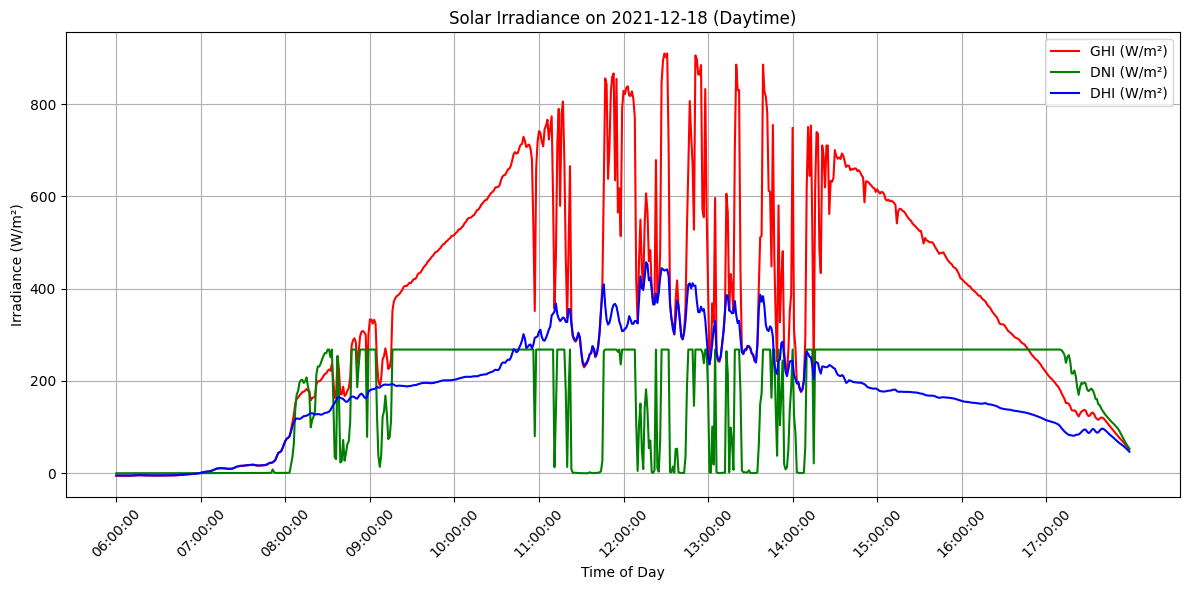

In [ ]:
plot_day(
    df_sl,
    plot_data=[
        {"column": "GHI", "label": "GHI (W/m²)", "color": "red"},
        {"column": "DNI", "label": "DNI (W/m²)", "color": "green"},
        {"column": "DHI", "label": "DHI (W/m²)", "color": "blue"},
    ],
    title="Solar Irradiance",
    ylabel="Irradiance (W/m²)",
    daytime_only=True,
    date="2021-12-18",
)

Selected Date: 2021-12-18


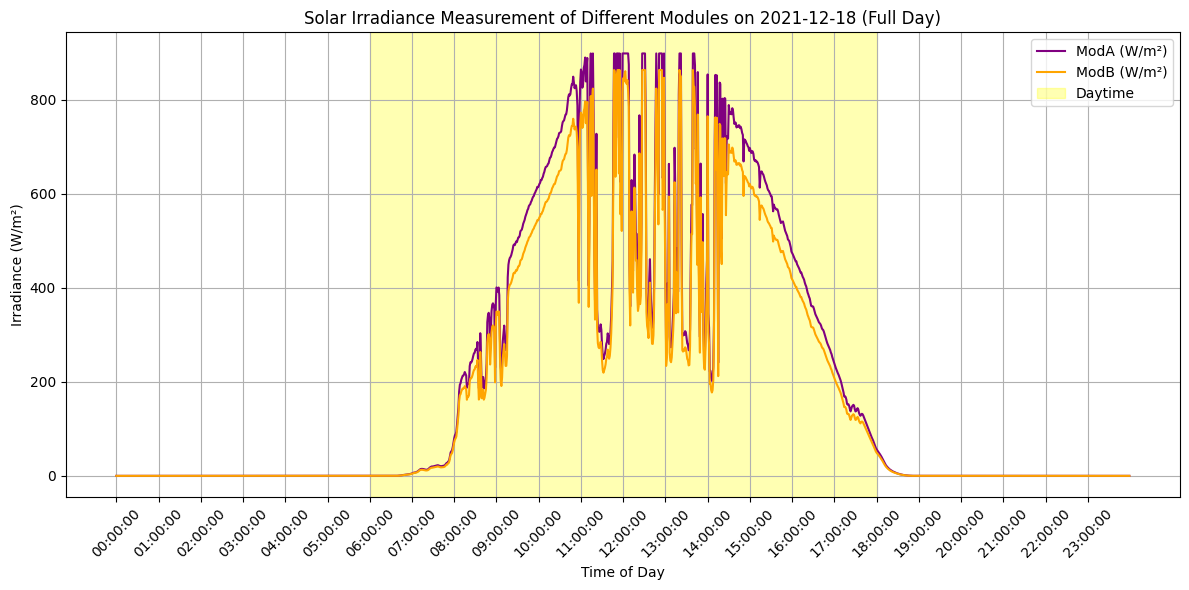

In [50]:
plot_day(
    df_sl,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)", "color": "purple"},
        {"column": "ModB", "label": "ModB (W/m²)", "color": "orange"},
    ],
    title="Solar Irradiance Measurement of Different Modules",
    ylabel="Irradiance (W/m²)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


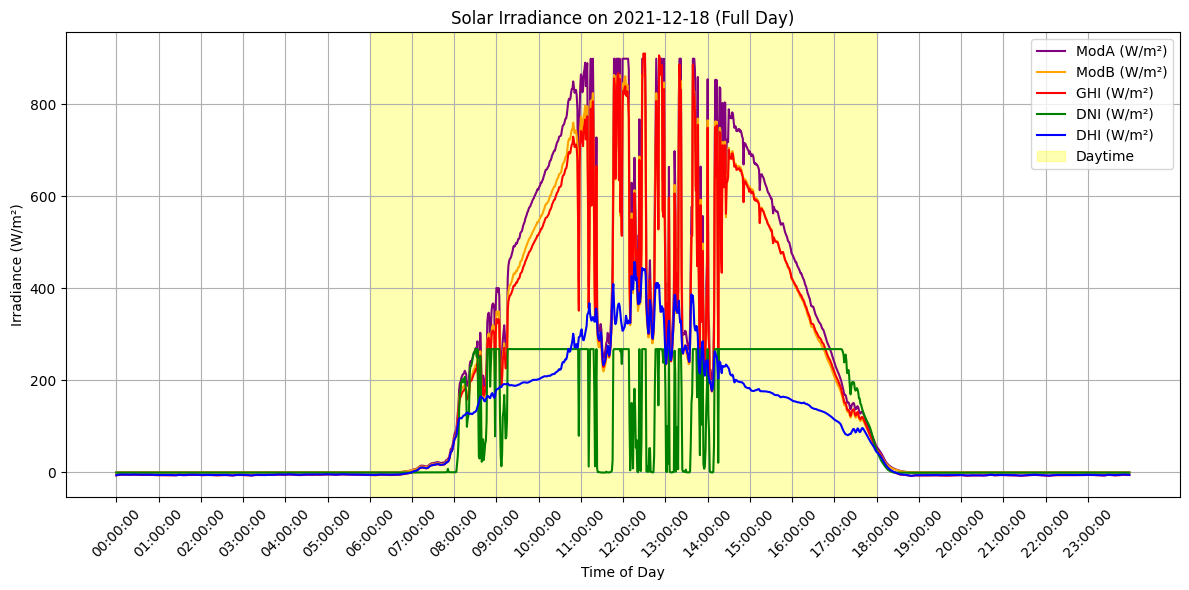

In [51]:
plot_day(
    df_sl,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)", "color": "purple"},
        {"column": "ModB", "label": "ModB (W/m²)", "color": "orange"},
        {"column": "GHI", "label": "GHI (W/m²)", "color": "red"},
        {"column": "DNI", "label": "DNI (W/m²)", "color": "green"},
        {"column": "DHI", "label": "DHI (W/m²)", "color": "blue"},
    ],
    title="Solar Irradiance",
    ylabel="Irradiance (W/m²)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


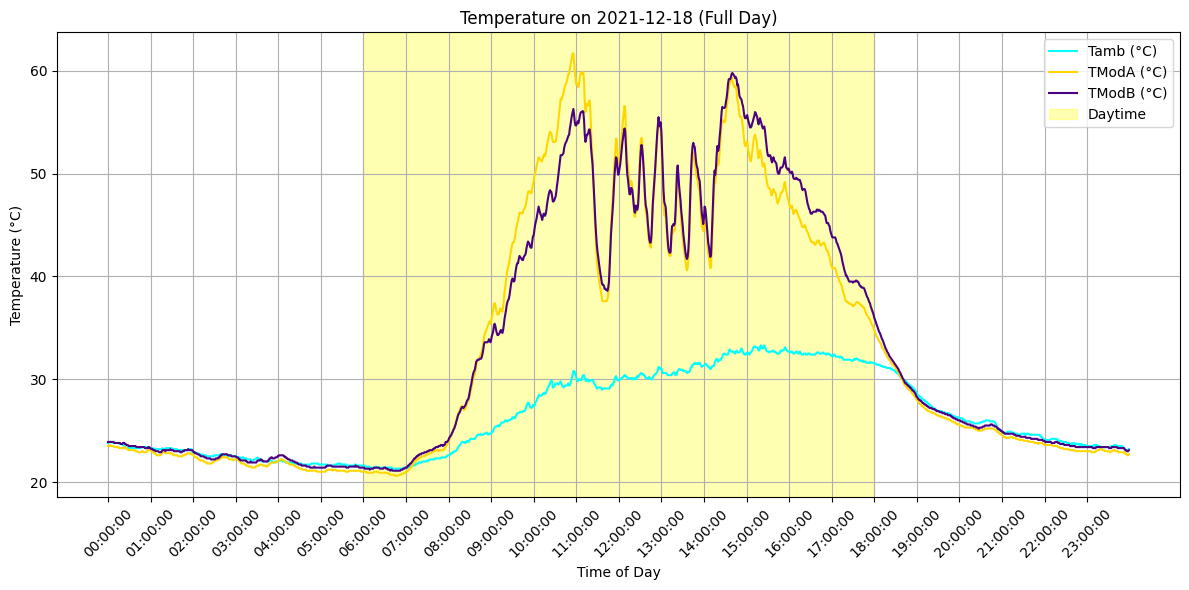

In [52]:
plot_day(
    df_sl,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)", "color": "cyan"},
        {"column": "TModA", "label": "TModA (°C)", "color": "gold"},
        {"column": "TModB", "label": "TModB (°C)", "color": "indigo"},
    ],
    title="Temperature",
    ylabel="Temperature (°C)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


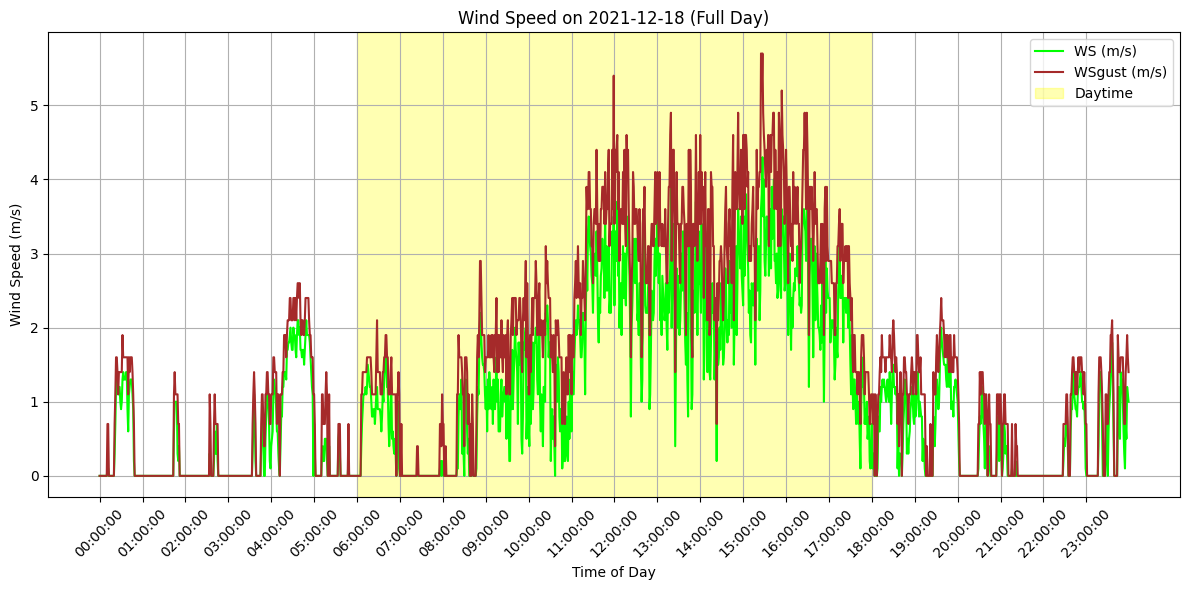

In [53]:
plot_day(
    df_sl,
    plot_data=[
        {"column": "WS", "label": "WS (m/s)", "color": "lime"},
        {"column": "WSgust", "label": "WSgust (m/s)", "color": "brown"},
    ],
    title="Wind Speed",
    ylabel="Wind Speed (m/s)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


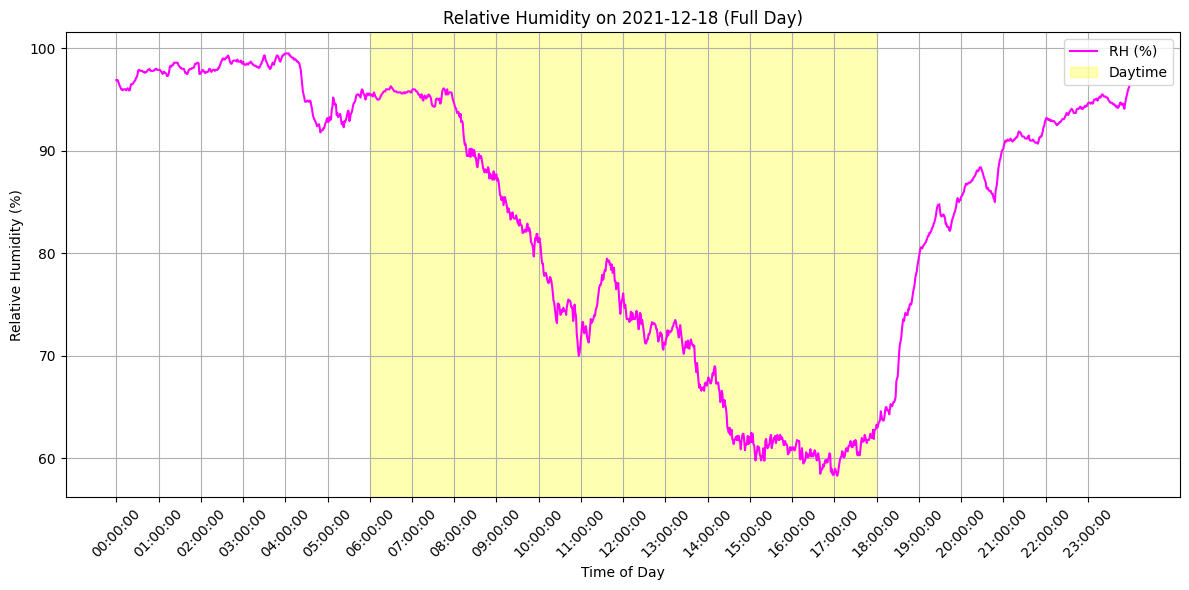

In [54]:
plot_day(
    df_sl,
    plot_data=[{"column": "RH", "label": "RH (%)", "color": "magenta"}],
    title="Relative Humidity",
    ylabel="Relative Humidity (%)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


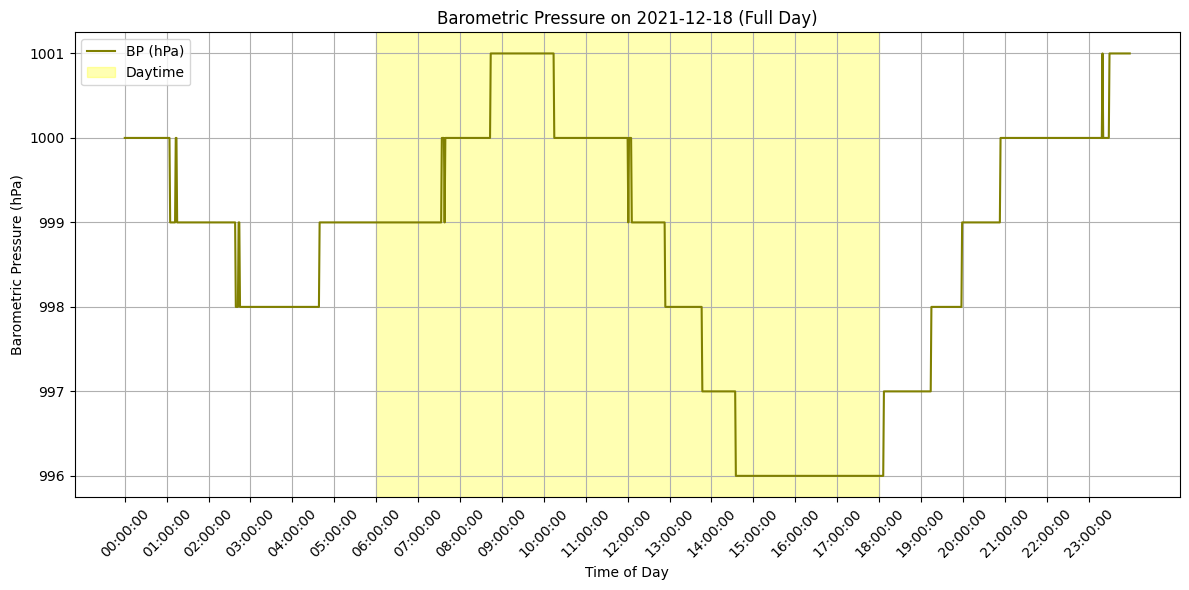

In [55]:
plot_day(
    df_sl,
    plot_data=[{"column": "BP", "label": "BP (hPa)", "color": "olive"}],
    title="Barometric Pressure",
    ylabel="Barometric Pressure (hPa)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2022-08-08


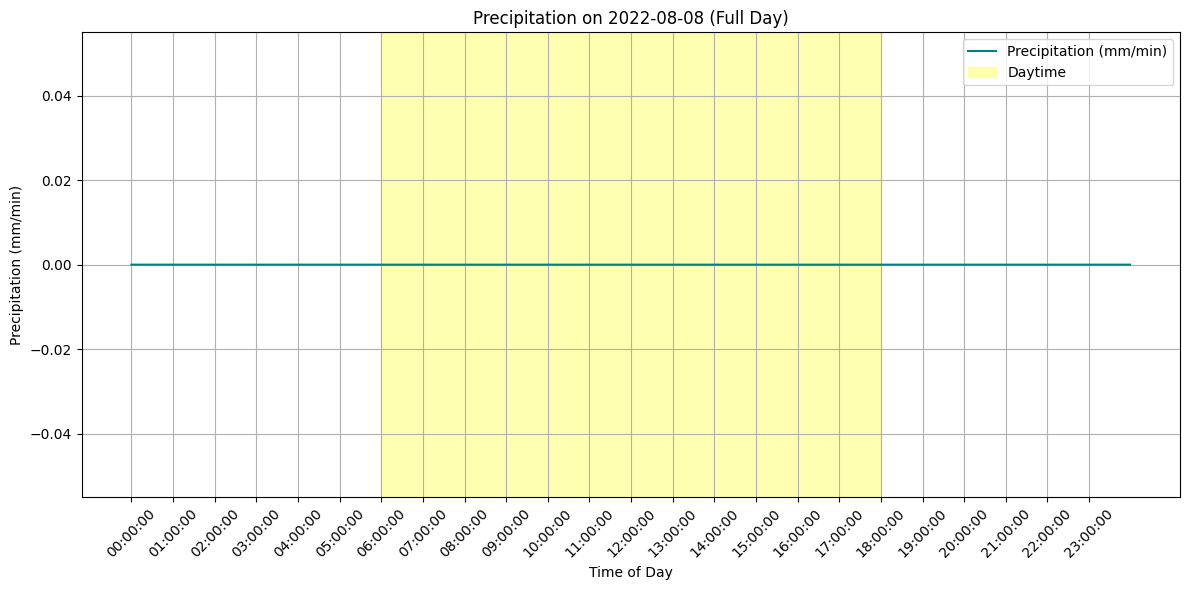

In [56]:
plot_day(
    df_sl,
    plot_data=[
        {"column": "Precipitation", "label": "Precipitation (mm/min)", "color": "teal"}
    ],
    title="Precipitation",
    ylabel="Precipitation (mm/min)",
    daytime_only=False,
    # date='2021-12-18'
    # date='2022-04-20'
)

Selected Date: 2021-12-18


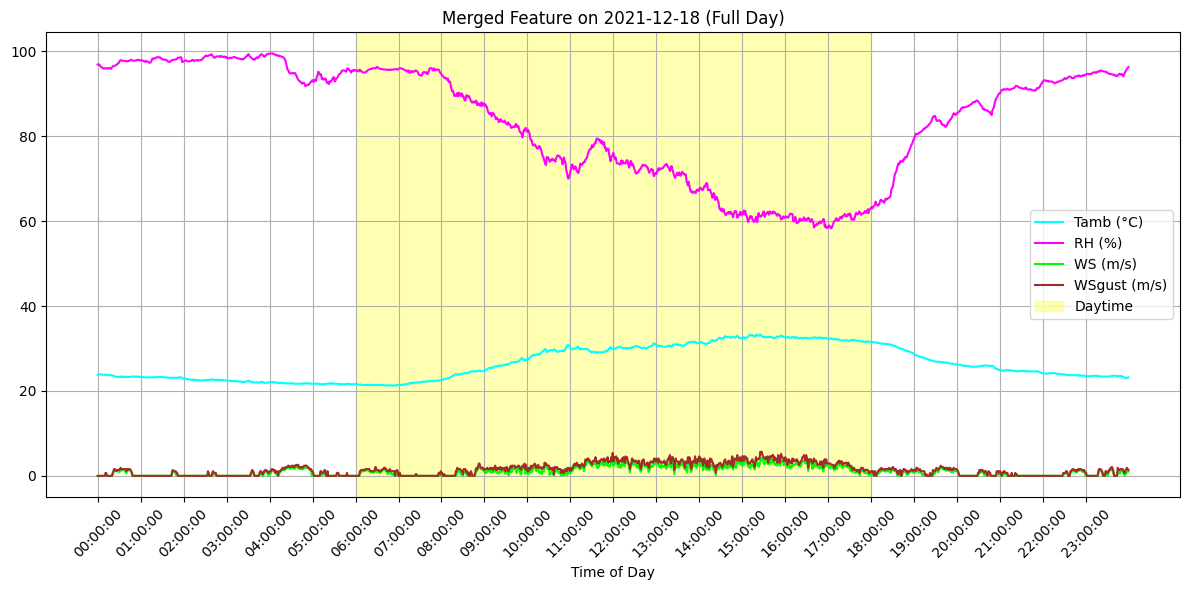

In [57]:
plot_day(
    df_sl,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)", "color": "cyan"},
        {"column": "RH", "label": "RH (%)", "color": "magenta"},
        {"column": "WS", "label": "WS (m/s)", "color": "lime"},
        {"column": "WSgust", "label": "WSgust (m/s)", "color": "brown"},
    ],
    title="Merged Feature",
    ylabel="",
    daytime_only=False,
    date="2021-12-18",
)

### Monthly Time Series


In [58]:
def plot_month(df, plot_data, title, ylabel, daytime_only=True, month=None):
    """Plots the data feature for a randomly selected or specified month from the dataframe."""

    # Select the month: use provided month or choose randomly
    if not month:
        month = random.choice(df["month"].unique())

    print(f"Selected Month: {month}")

    # Filter the DataFrame for the selected month
    month_data = df[df["month"] == month]

    # Filter for daytime if daytime_only is True
    if daytime_only:
        month_data = month_data[
            (month_data.index.hour >= 6) & (month_data.index.hour < 18)
        ]

    plt.figure(figsize=(18, 6))

    # Plot the specified columns
    for data in plot_data:
        plt.plot(
            month_data.index,
            month_data[data["column"]],
            label=data["label"],
            color=data["color"],
        )

    plt.xlabel("Date")
    plt.ylabel(ylabel)
    plt.title(
        f"{title} for {month_data['month_name'].iloc[0]} ({'Daytime' if daytime_only else 'Full Day'})"
    )
    plt.legend()
    plt.grid(True)

    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

Selected Month: 4


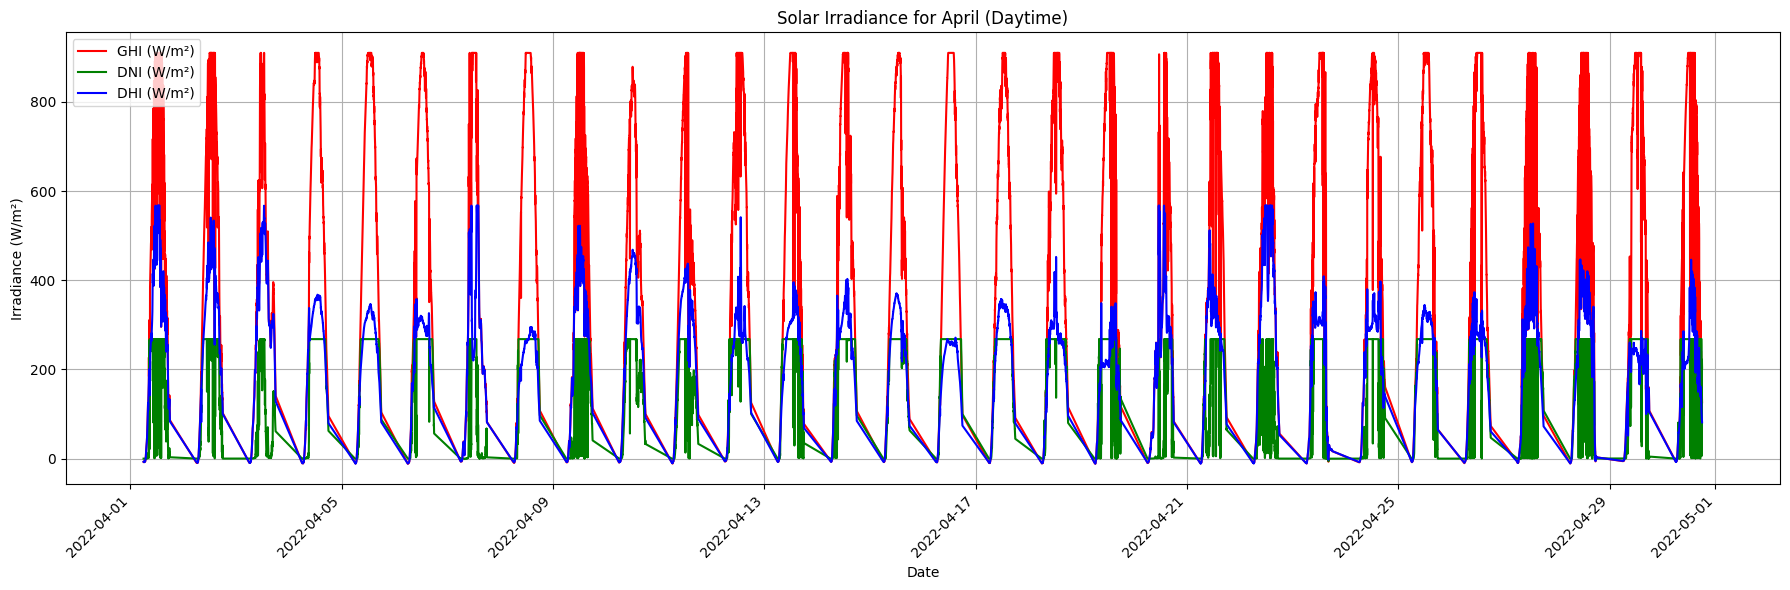

In [59]:
plot_month(
    df_sl,
    plot_data=[
        {"column": "GHI", "label": "GHI (W/m²)", "color": "red"},
        {"column": "DNI", "label": "DNI (W/m²)", "color": "green"},
        {"column": "DHI", "label": "DHI (W/m²)", "color": "blue"},
    ],
    title="Solar Irradiance",
    ylabel="Irradiance (W/m²)",
    daytime_only=True,
    month=4,
)

Selected Month: 4


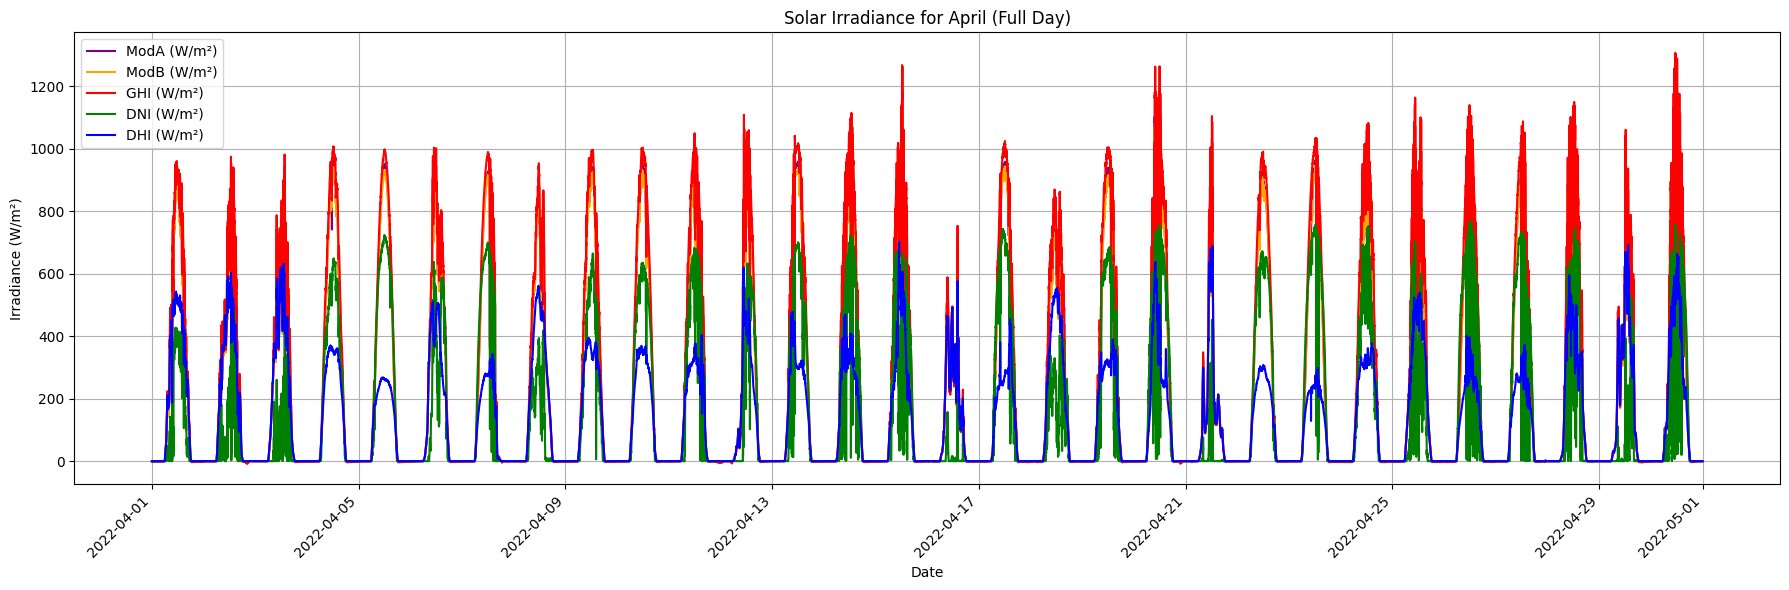

In [ ]:
plot_month(
    df_sl,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)", "color": "purple"},
        {"column": "ModB", "label": "ModB (W/m²)", "color": "orange"},
        {"column": "GHI", "label": "GHI (W/m²)", "color": "red"},
        {"column": "DNI", "label": "DNI (W/m²)", "color": "green"},
        {"column": "DHI", "label": "DHI (W/m²)", "color": "blue"},
    ],
    title="Solar Irradiance",
    ylabel="Irradiance (W/m²)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


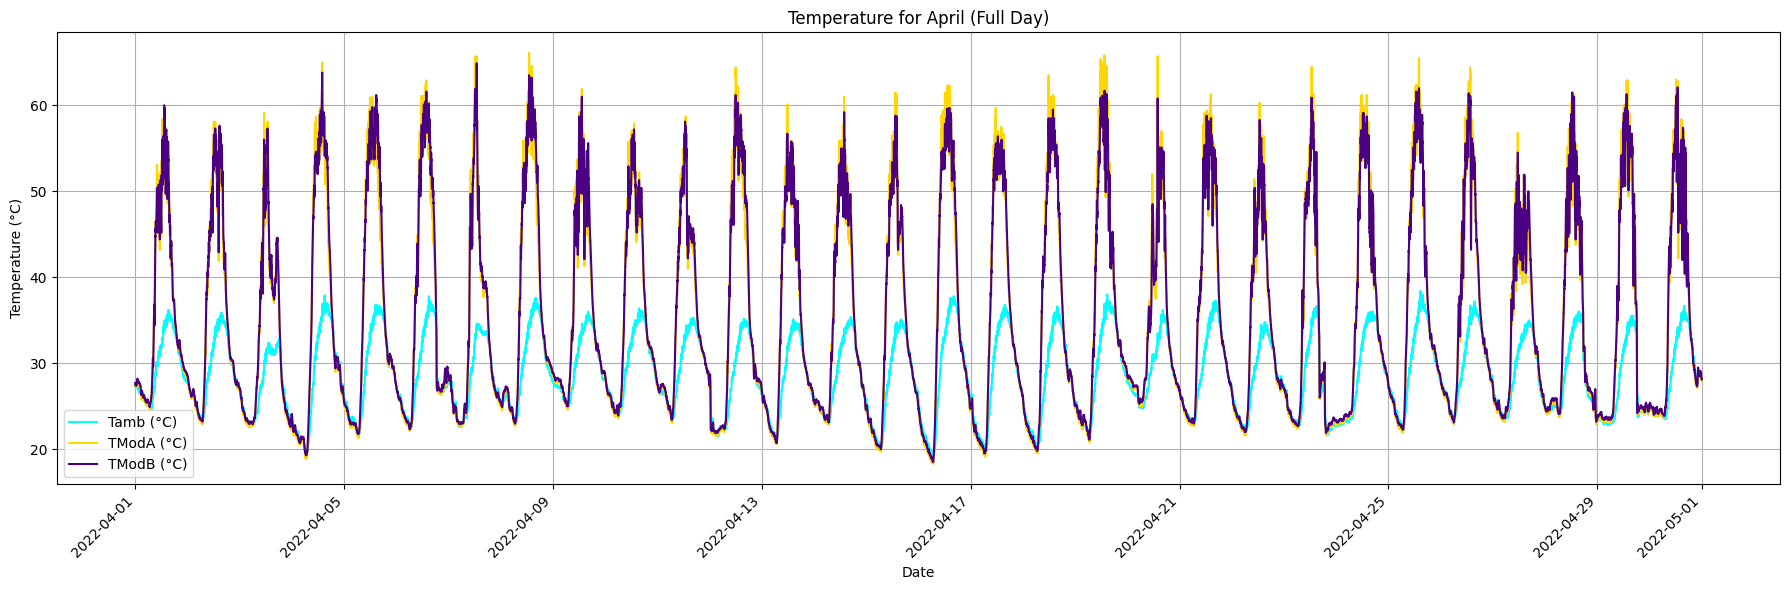

In [60]:
plot_month(
    df_sl,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)", "color": "cyan"},
        {"column": "TModA", "label": "TModA (°C)", "color": "gold"},
        {"column": "TModB", "label": "TModB (°C)", "color": "indigo"},
    ],
    title="Temperature",
    ylabel="Temperature (°C)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


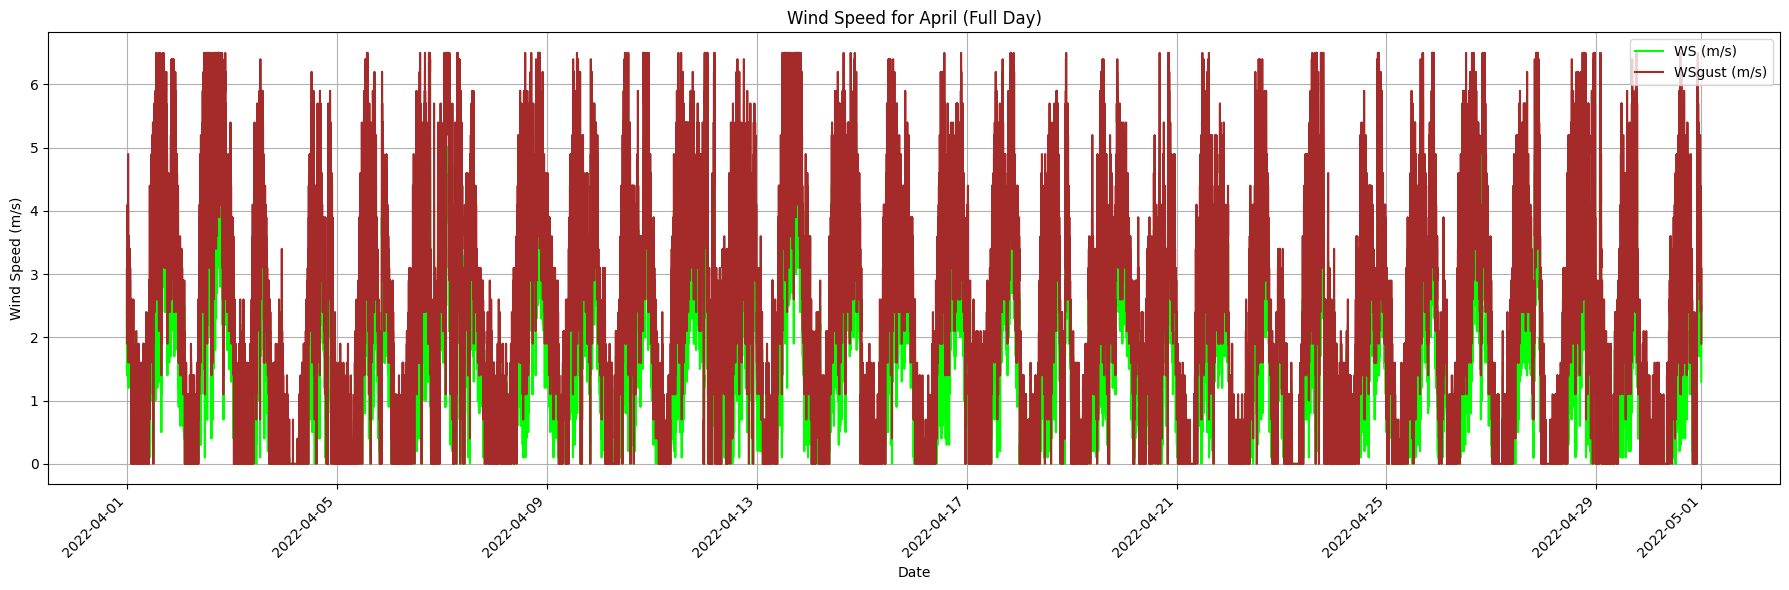

In [61]:
plot_month(
    df_sl,
    plot_data=[
        {"column": "WS", "label": "WS (m/s)", "color": "lime"},
        {"column": "WSgust", "label": "WSgust (m/s)", "color": "brown"},
    ],
    title="Wind Speed",
    ylabel="Wind Speed (m/s)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


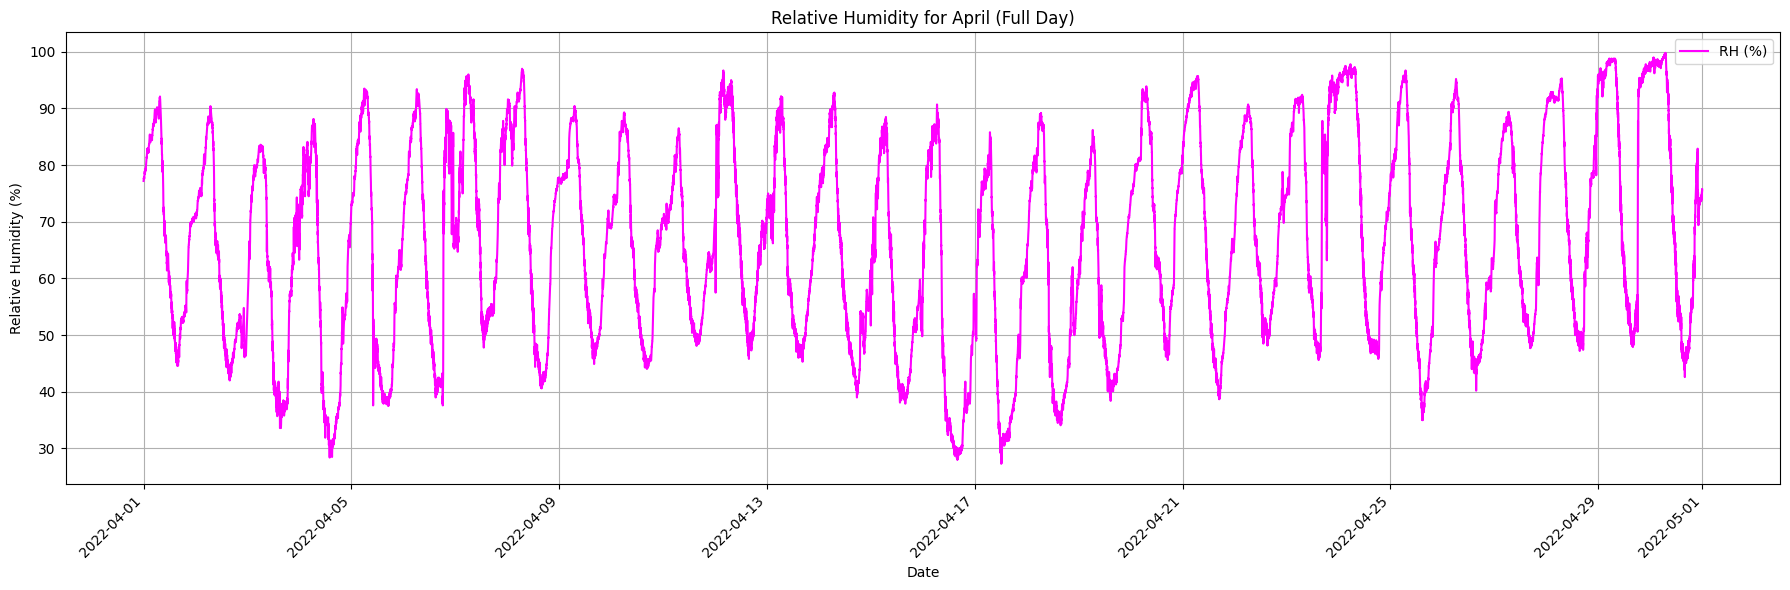

In [62]:
plot_month(
    df_sl,
    plot_data=[{"column": "RH", "label": "RH (%)", "color": "magenta"}],
    title="Relative Humidity",
    ylabel="Relative Humidity (%)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


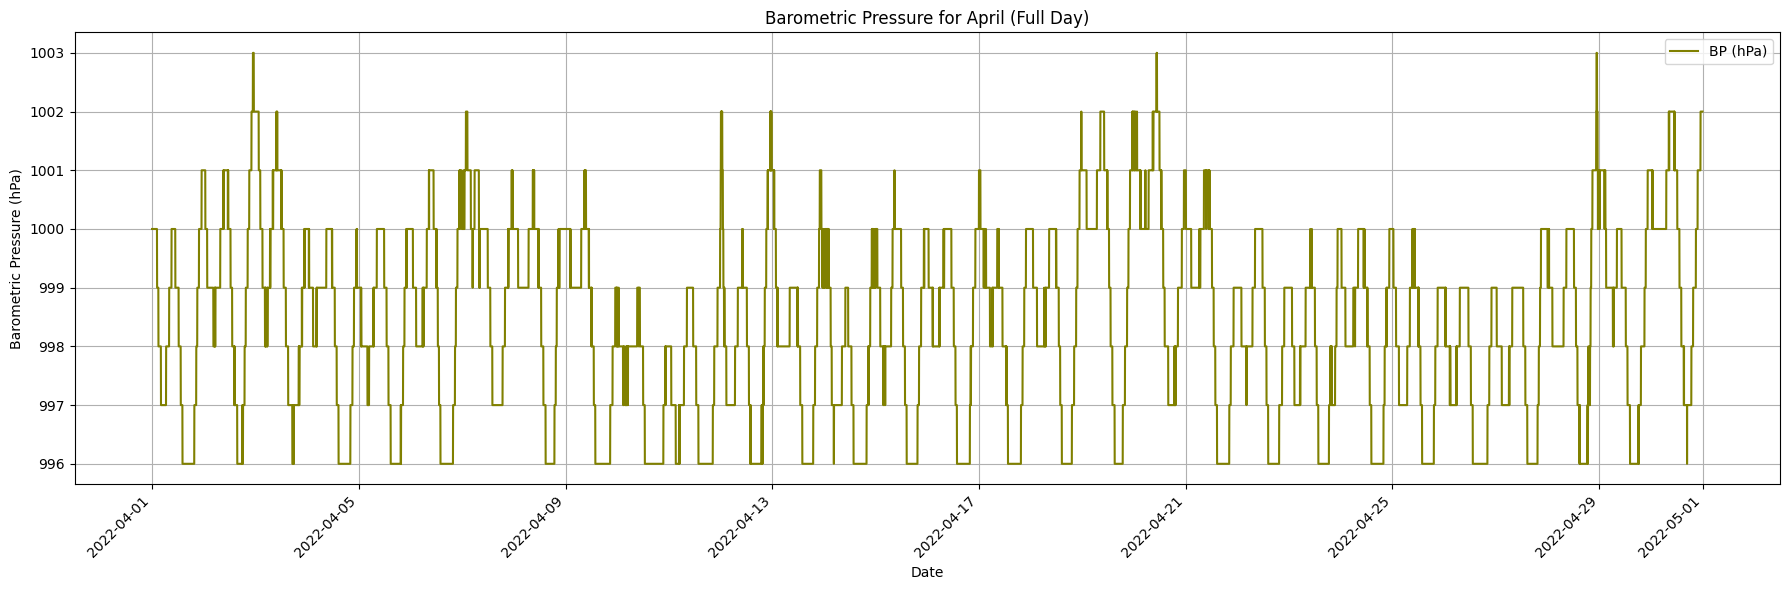

In [63]:
plot_month(
    df_sl,
    plot_data=[{"column": "BP", "label": "BP (hPa)", "color": "olive"}],
    title="Barometric Pressure",
    ylabel="Barometric Pressure (hPa)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


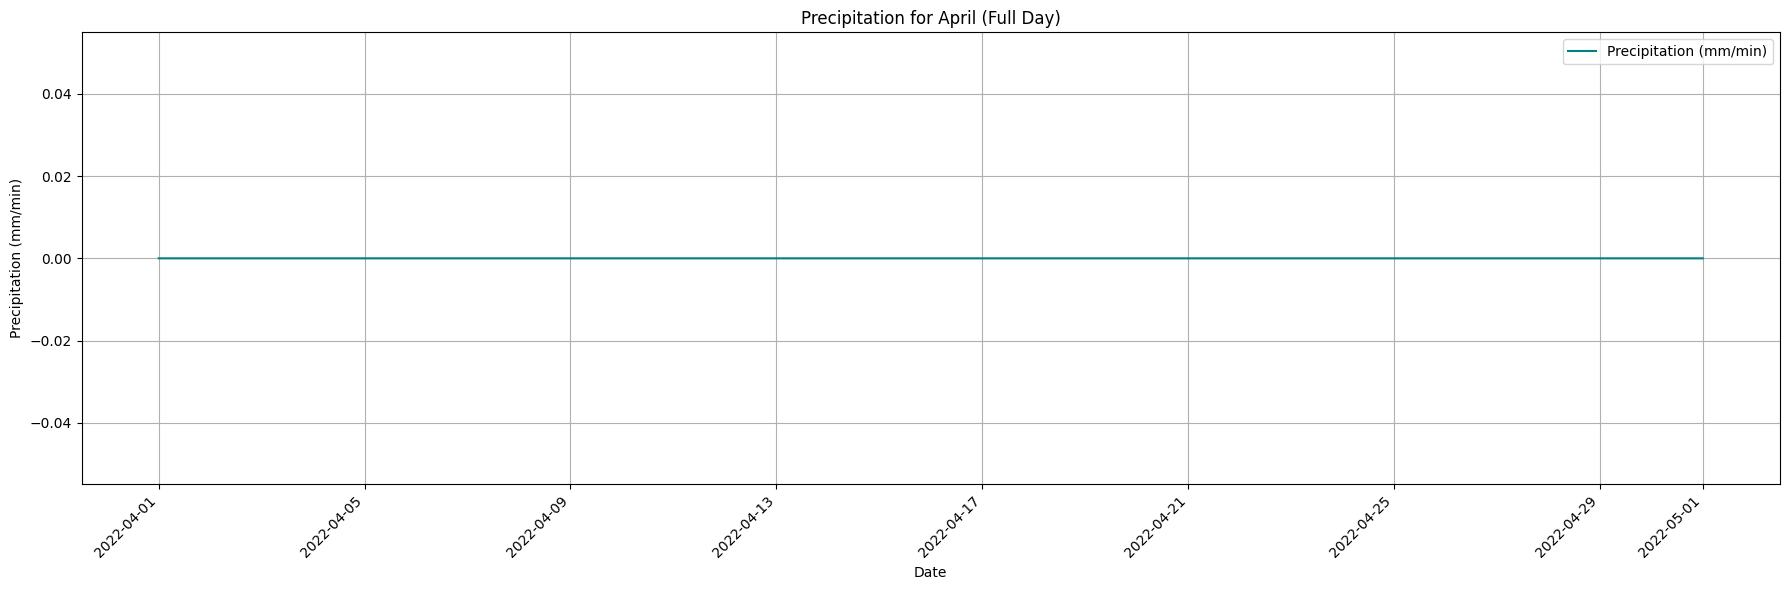

In [64]:
plot_month(
    df_sl,
    plot_data=[
        {"column": "Precipitation", "label": "Precipitation (mm/min)", "color": "teal"}
    ],
    title="Precipitation",
    ylabel="Precipitation (mm/min)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


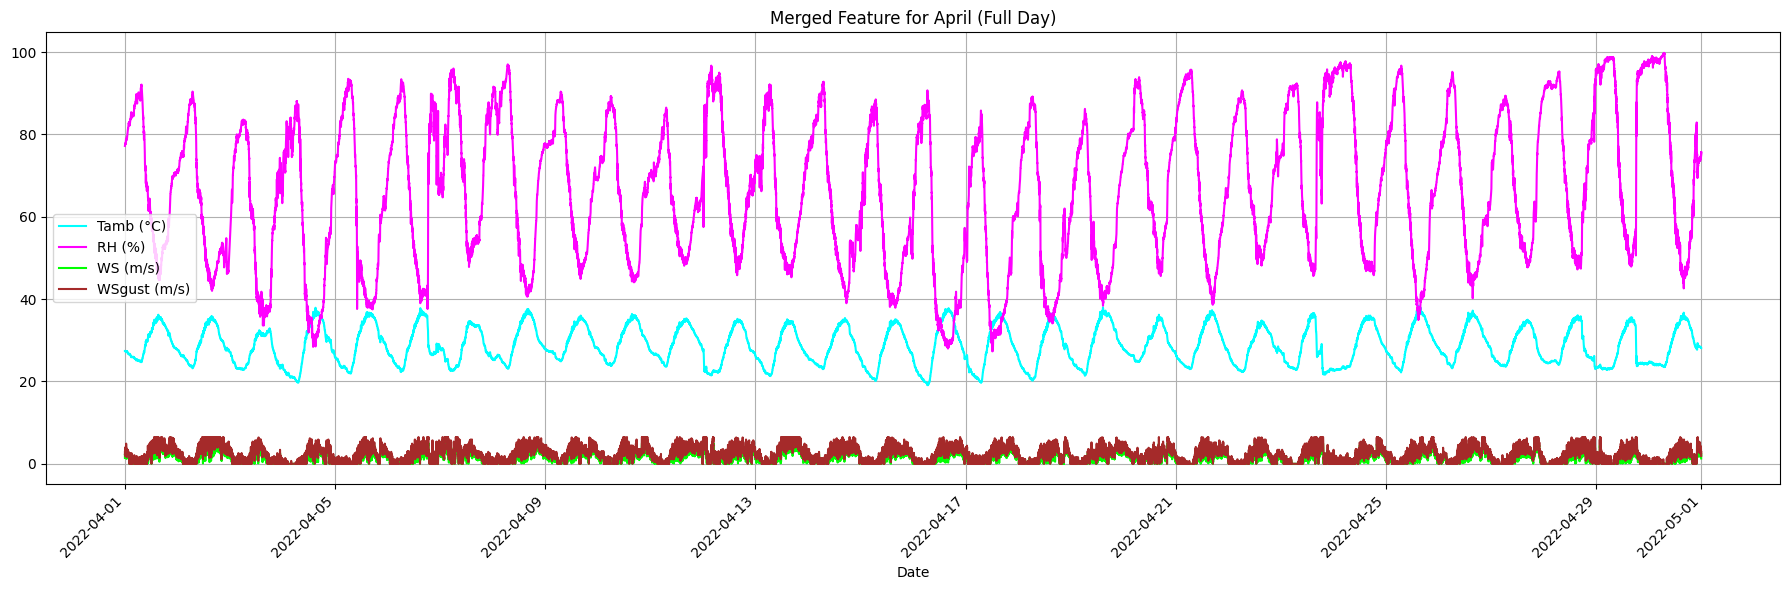

In [65]:
plot_month(
    df_sl,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)", "color": "cyan"},
        {"column": "RH", "label": "RH (%)", "color": "magenta"},
        {"column": "WS", "label": "WS (m/s)", "color": "lime"},
        {"column": "WSgust", "label": "WSgust (m/s)", "color": "brown"},
    ],
    title="Merged Feature",
    ylabel="",
    daytime_only=False,
    month=4,
)

### Days of the Month Plots

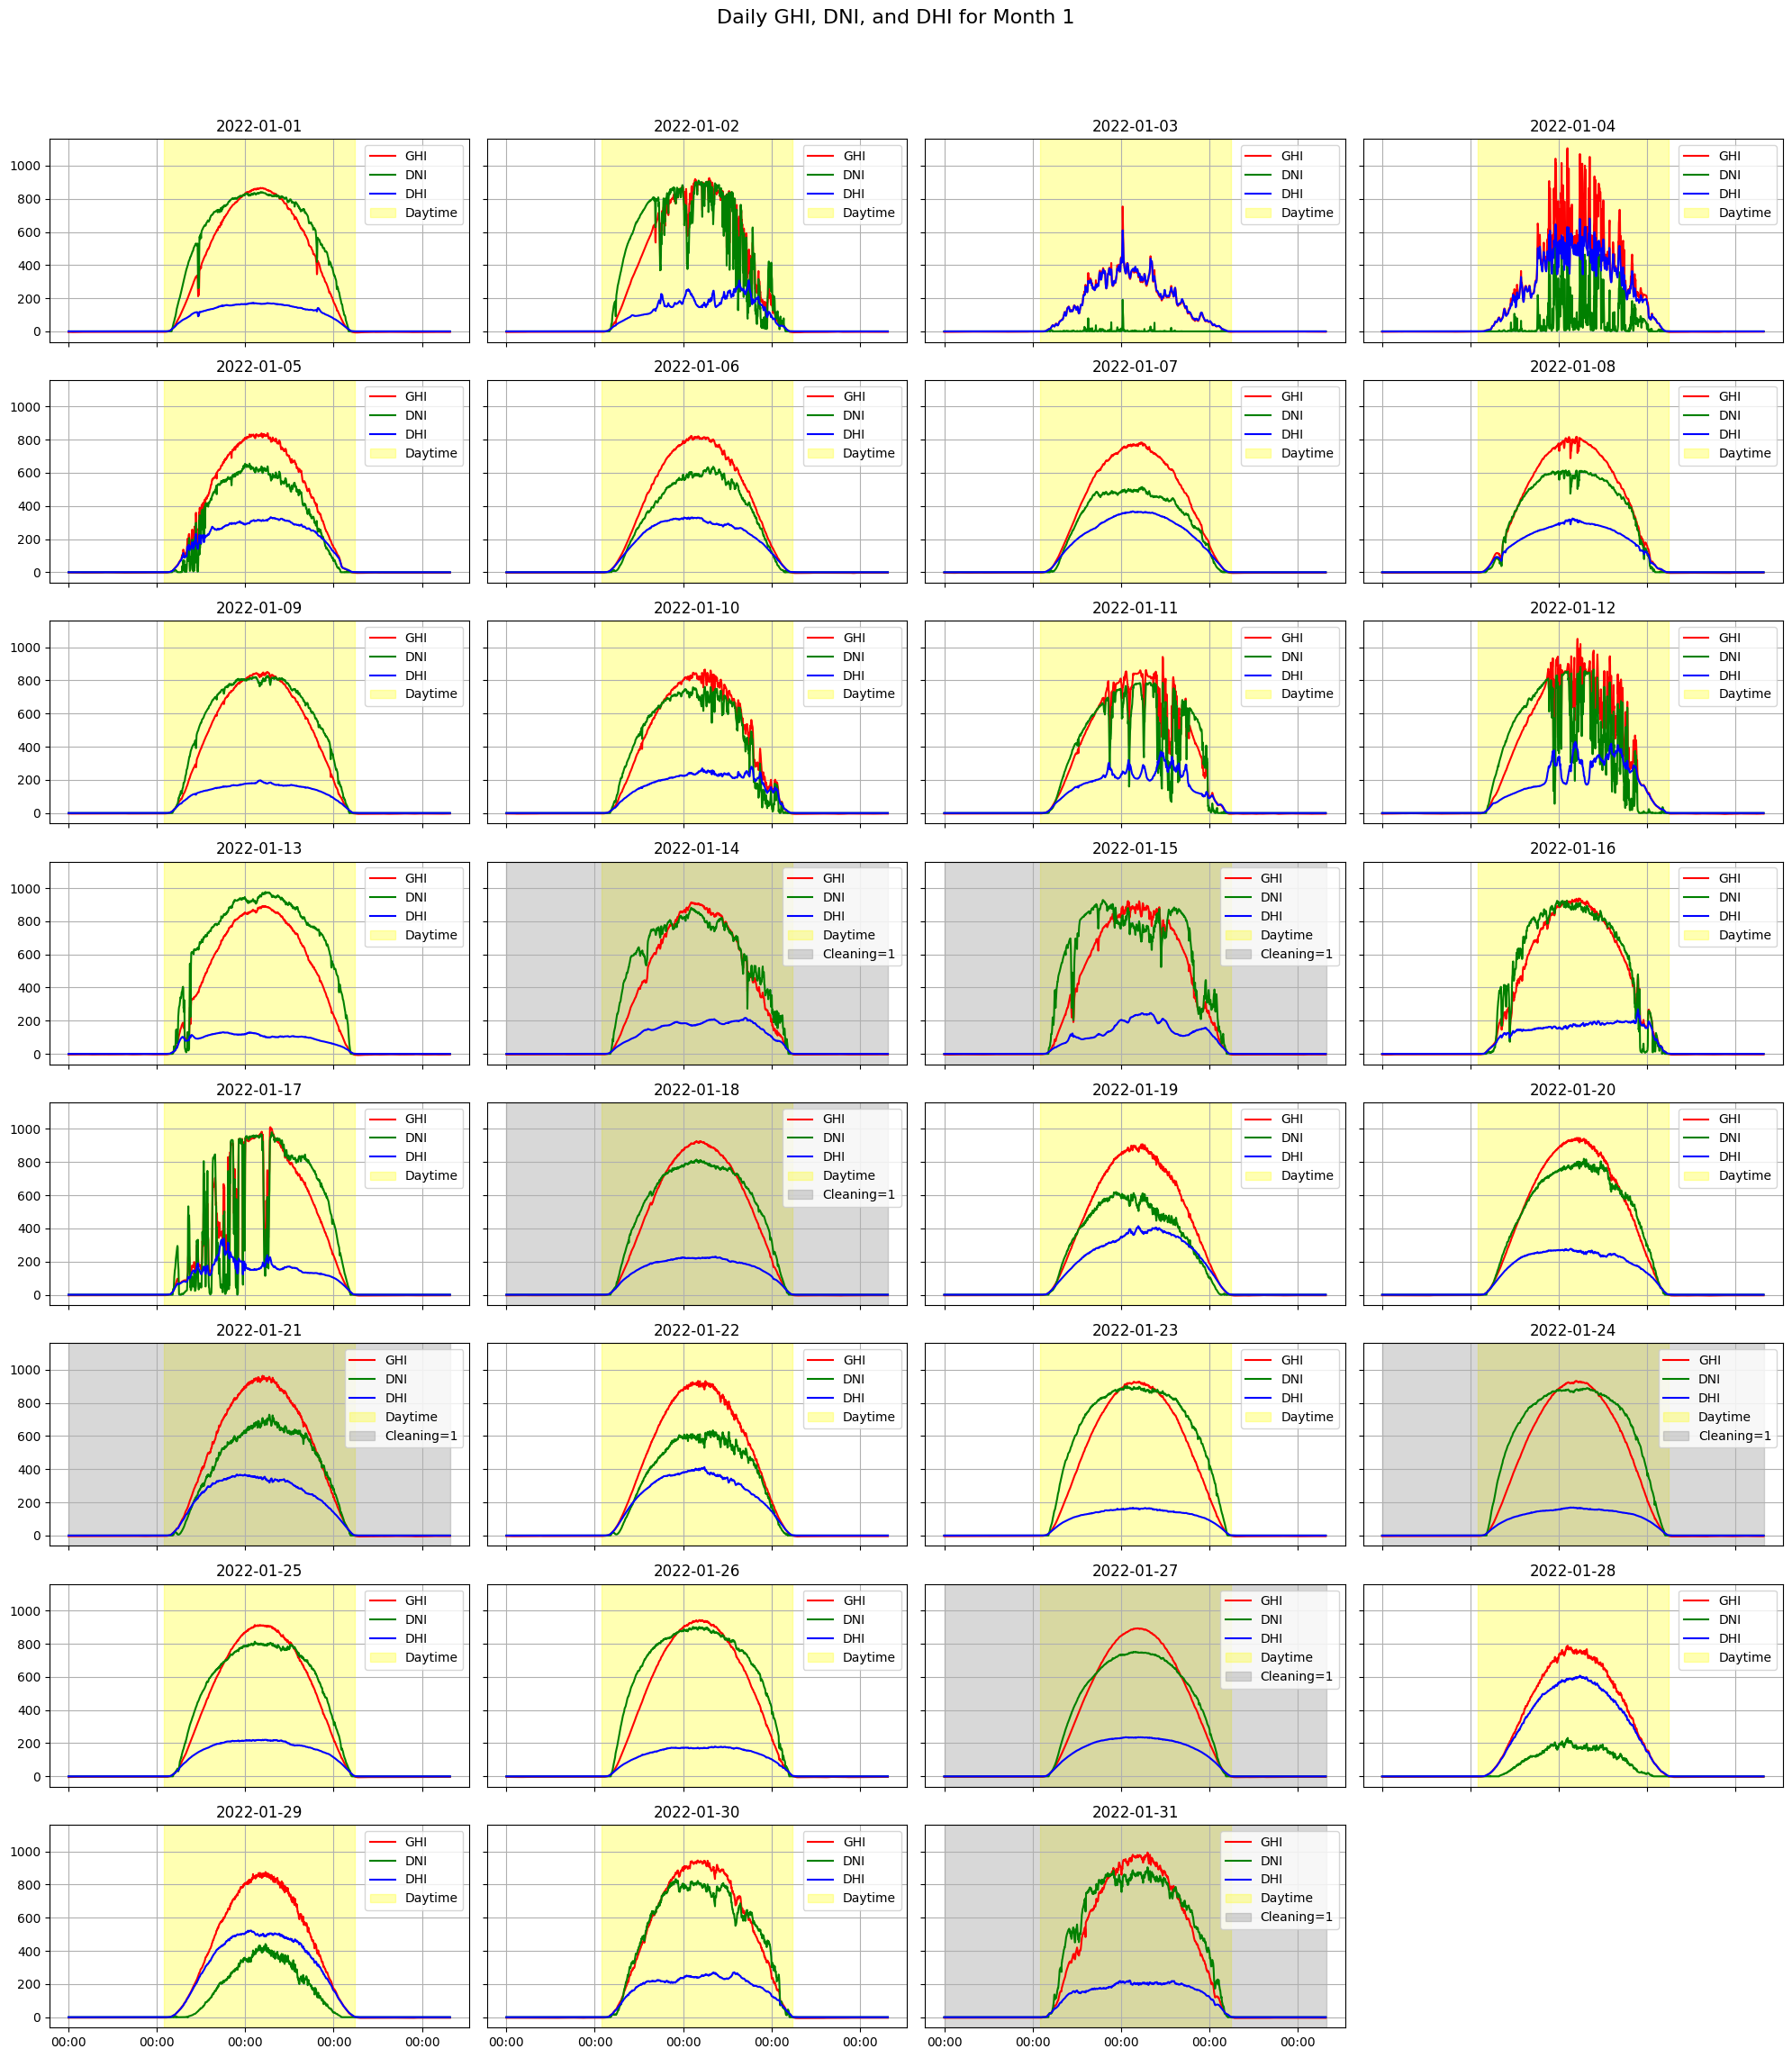

In [ ]:
month_to_plot = 1

# Filter the DataFrame for the selected month
monthly_data = df_sl[df_sl.index.month == month_to_plot]
date_cleaned = monthly_data[monthly_data["Cleaning"] == 1]["date"].unique()


# Create a pivot table for each variable (GHI, DNI, DHI)
ghi_pivot = monthly_data.pivot_table(values="GHI", index="time", columns="date")
dni_pivot = monthly_data.pivot_table(values="DNI", index="time", columns="date")
dhi_pivot = monthly_data.pivot_table(values="DHI", index="time", columns="date")

# Get the number of days in the selected month
num_days = len(ghi_pivot.columns)

# Calculate the number of rows and columns for subplots
num_cols = 4
num_rows = (num_days + num_cols - 1) // num_cols

fig, axes = plt.subplots(
    num_rows, num_cols, figsize=(20, 3 * num_rows), sharex=True, sharey=True
)
fig.suptitle(f"Daily GHI, DNI, and DHI for Month {month_to_plot}", fontsize=16)

# Define the time formatter
time_formatter = DateFormatter("%H:%M")  # Format time as HH:MM

# Iterate through the days and plot the data
for i, date in enumerate(ghi_pivot.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Convert datetime.time objects to numerical values (total seconds since midnight)
    x_values = [t.hour * 3600 + t.minute * 60 + t.second for t in ghi_pivot.index]

    ax.plot(x_values, ghi_pivot[date], label="GHI", color="red")
    ax.plot(x_values, dni_pivot[date], label="DNI", color="green")
    ax.plot(x_values, dhi_pivot[date], label="DHI", color="blue")
    ax.plot(x_values, dhi_pivot[date], label="DHI", color="blue")
    ax.plot(x_values, dhi_pivot[date], label="DHI", color="blue")

    # Highlight daytime (6 AM to 6 PM)
    ax.axvspan(6 * 3600, 18 * 3600, color="yellow", alpha=0.3, label="Daytime")

    # hightlight the entire plot if cleaning column of month data == 1
    if date in date_cleaned:
        ax.axvspan(0, 24 * 3600, color="grey", alpha=0.3, label="Cleaning=1")

    ax.set_title(date.strftime("%Y-%m-%d"))
    ax.legend()
    ax.grid(True)

    # Set x-axis labels as time strings (after plotting)
    ax.xaxis.set_major_formatter(time_formatter)

# Hide any unused subplots
for i in range(num_days, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

Observations:
- Cleaning make the measurement a lot less noisy

## Histogram and Boxplots

In [66]:
def generate_hist_box_plots(df, plot_data, suptitle):
    """
    Generates histplots and boxplots for a list of dictionaries of title and column name.
    """

    num_cols = len(plot_data)
    fig, axes = plt.subplots(
        nrows=2,
        ncols=num_cols,
        figsize=(20, 5),
        sharey="row",
        sharex="col",
        gridspec_kw={"height_ratios": [7, 0.4]},
    )

    for i in range(len(plot_data)):
        sns.histplot(df[plot_data[i]["column"]], kde=True, ax=axes[0, i])
        sns.boxplot(x=df[plot_data[i]["column"]], ax=axes[1, i], orient="h")
        axes[1, i].set_xlabel(plot_data[i]["label"], fontsize=10)

    fig.suptitle(suptitle)
    fig.tight_layout()
    plt.show()

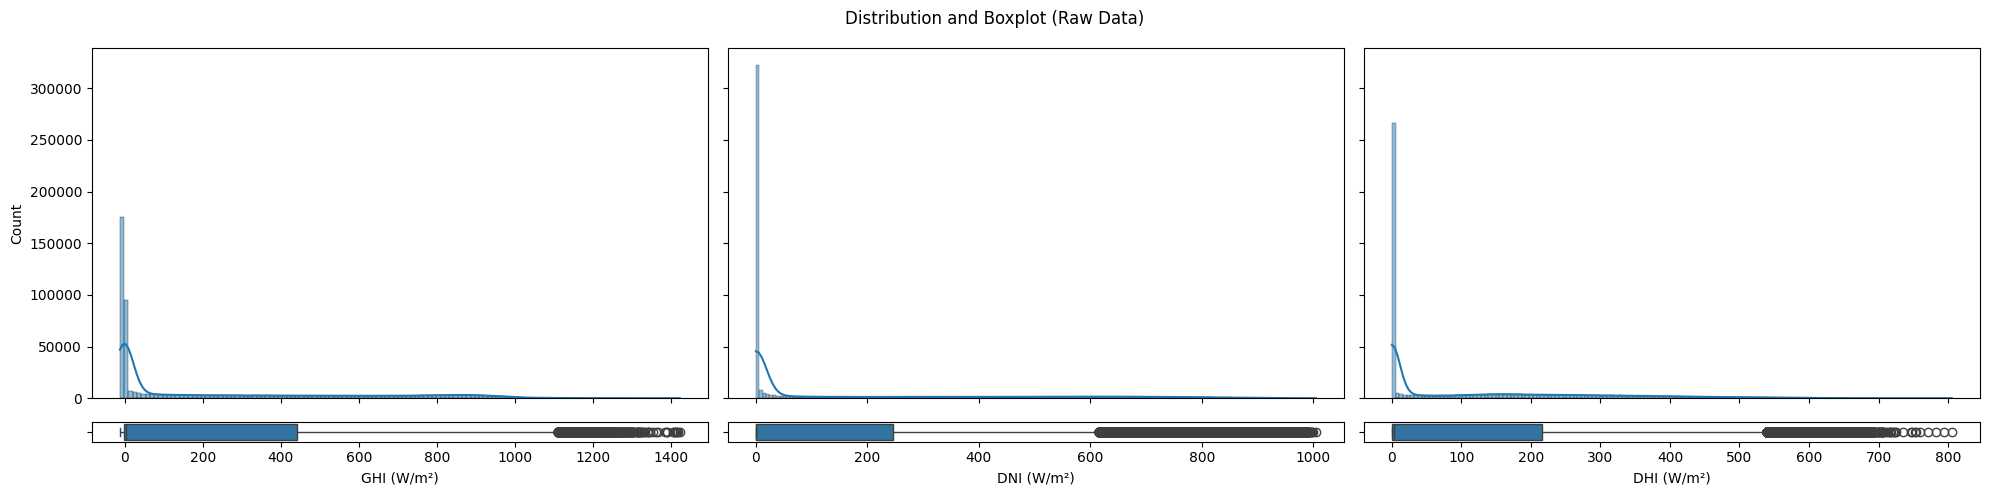

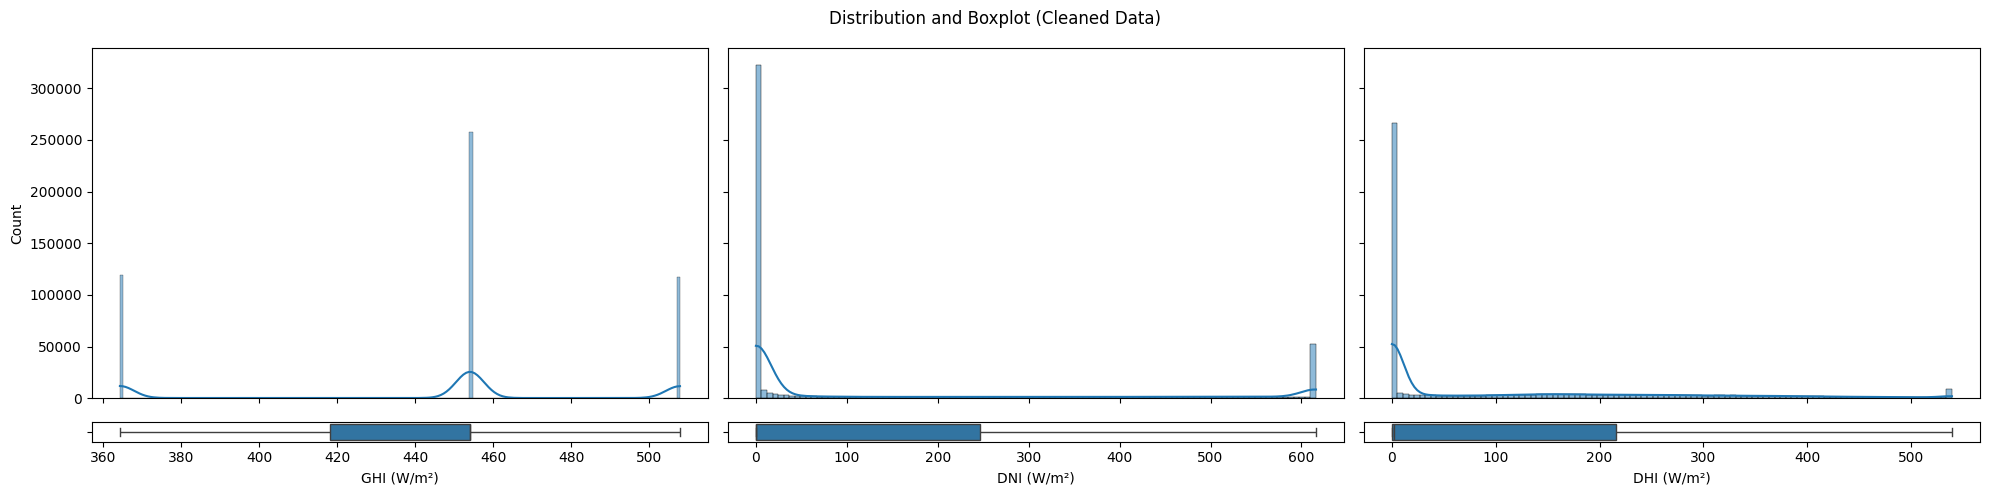

In [ ]:
generate_hist_box_plots(
    df_sl,
    plot_data=[
        {"column": "GHI", "label": "GHI (W/m²)"},
        {"column": "DNI", "label": "DNI (W/m²)"},
        {"column": "DHI", "label": "DHI (W/m²)"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)

generate_hist_box_plots(
    df_sl_cleaned,
    plot_data=[
        {"column": "GHI", "label": "GHI (W/m²)"},
        {"column": "DNI", "label": "DNI (W/m²)"},
        {"column": "DHI", "label": "DHI (W/m²)"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

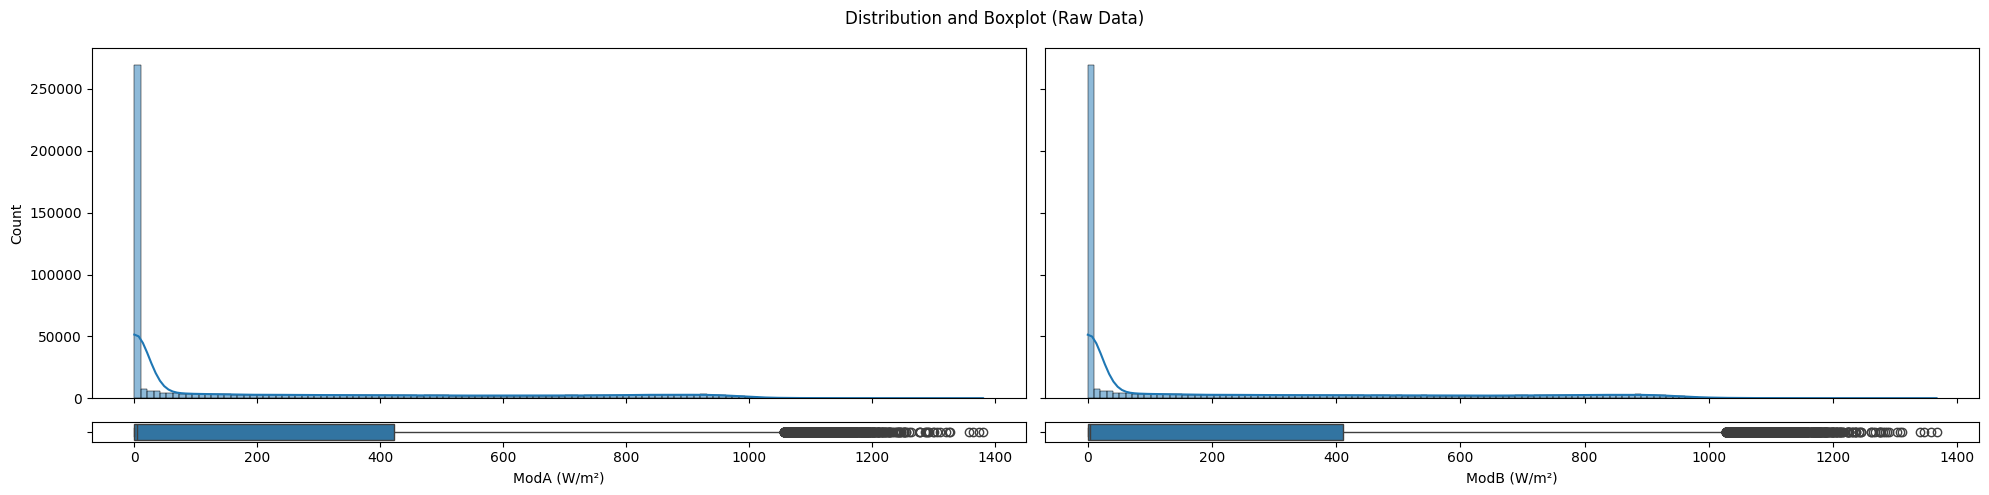

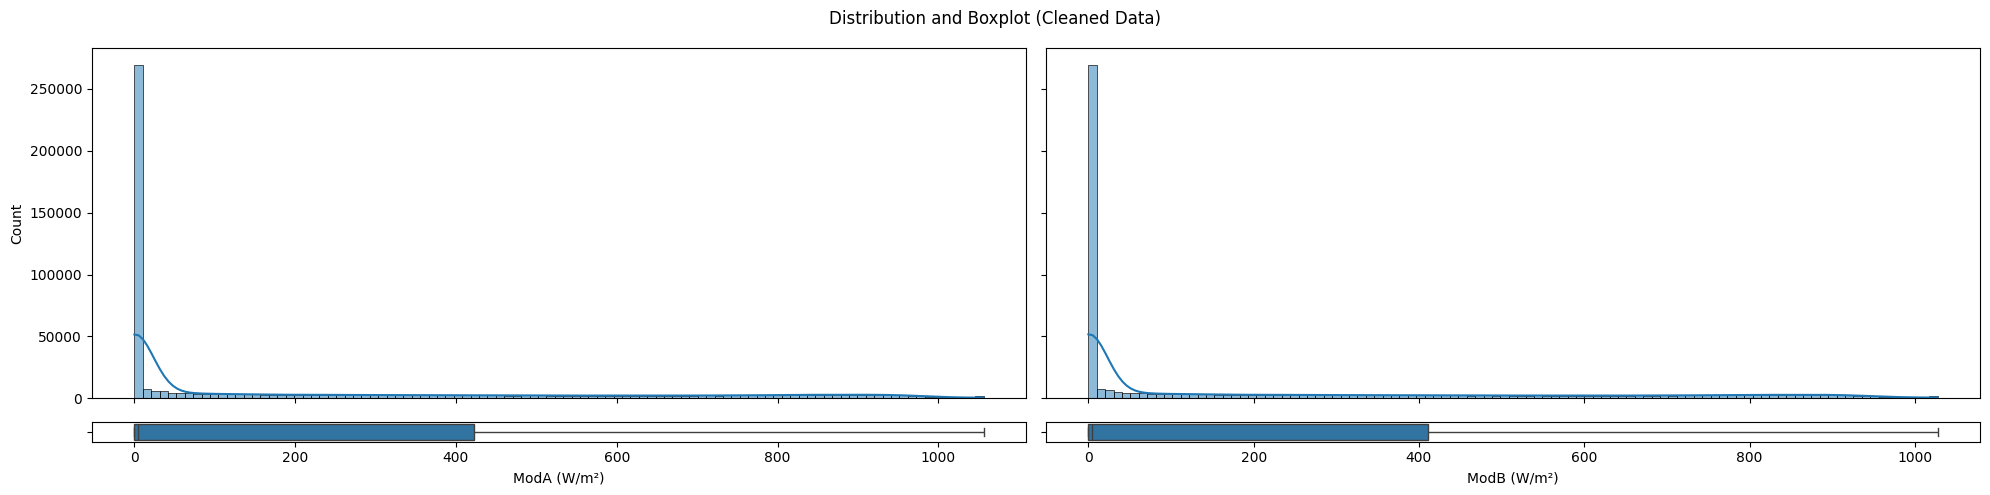

In [ ]:
generate_hist_box_plots(
    df_sl,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)"},
        {"column": "ModB", "label": "ModB (W/m²)"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)
generate_hist_box_plots(
    df_sl_cleaned,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)"},
        {"column": "ModB", "label": "ModB (W/m²)"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

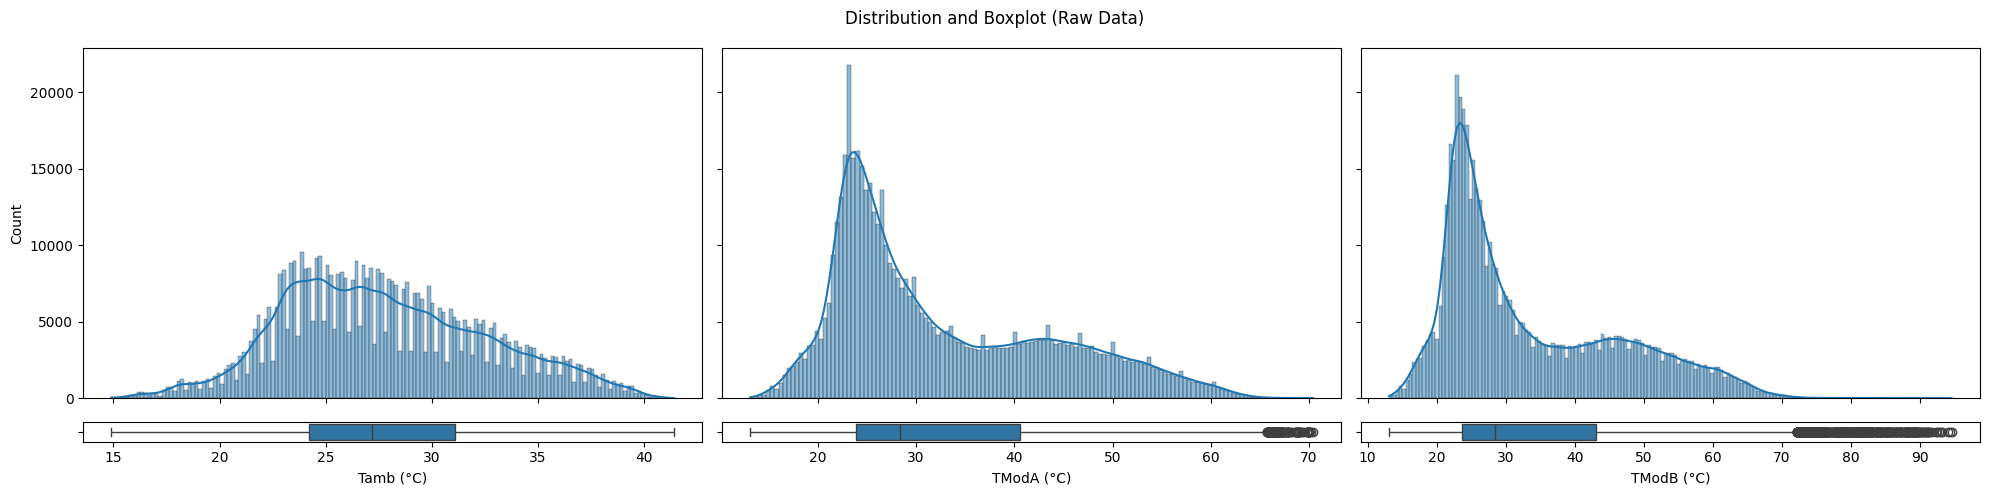

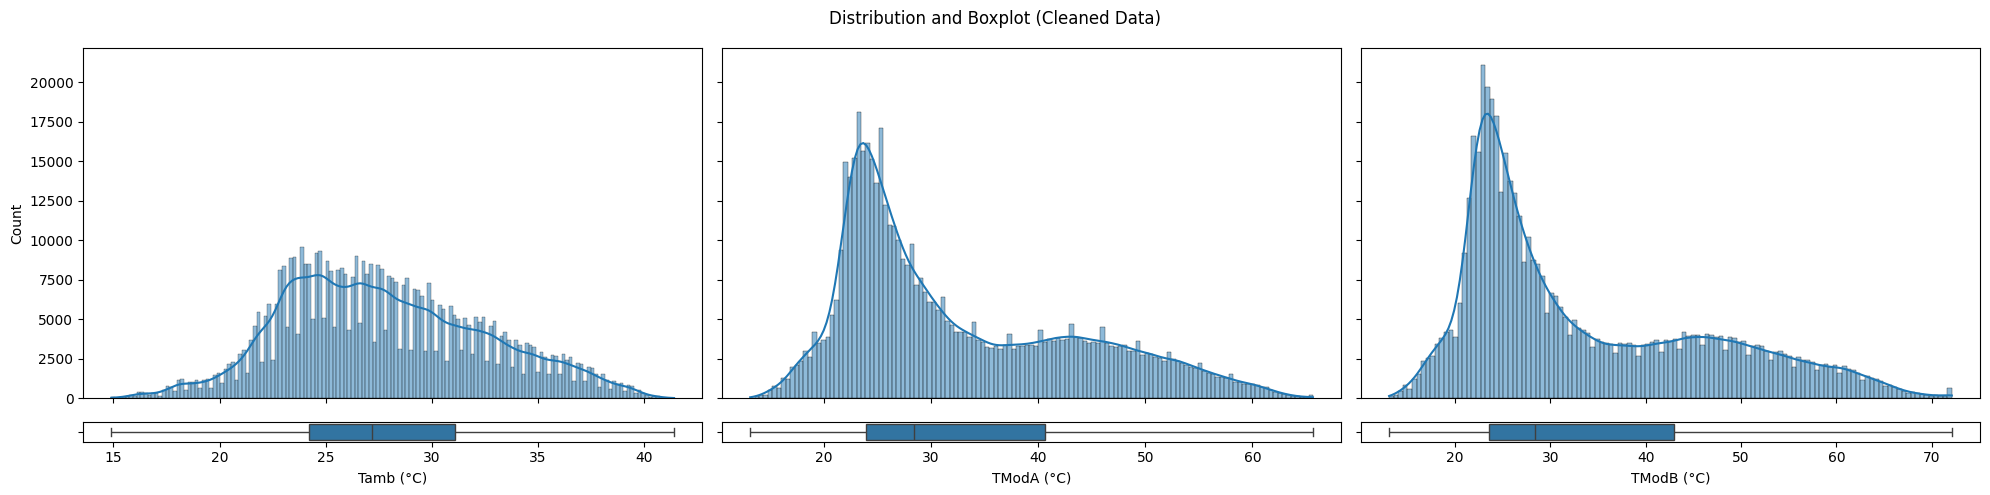

In [ ]:
generate_hist_box_plots(
    df_sl,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)"},
        {"column": "TModA", "label": "TModA (°C)"},
        {"column": "TModB", "label": "TModB (°C)"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)

generate_hist_box_plots(
    df_sl_cleaned,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)"},
        {"column": "TModA", "label": "TModA (°C)"},
        {"column": "TModB", "label": "TModB (°C)"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

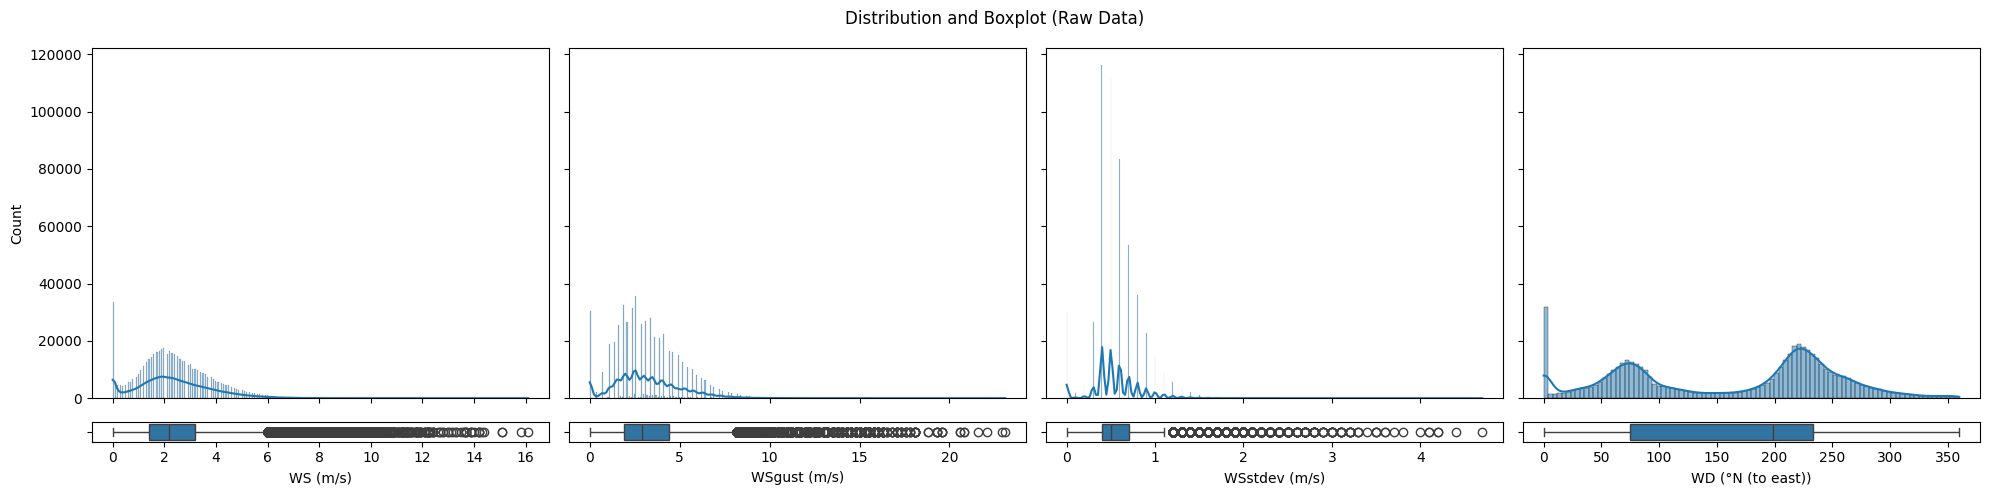

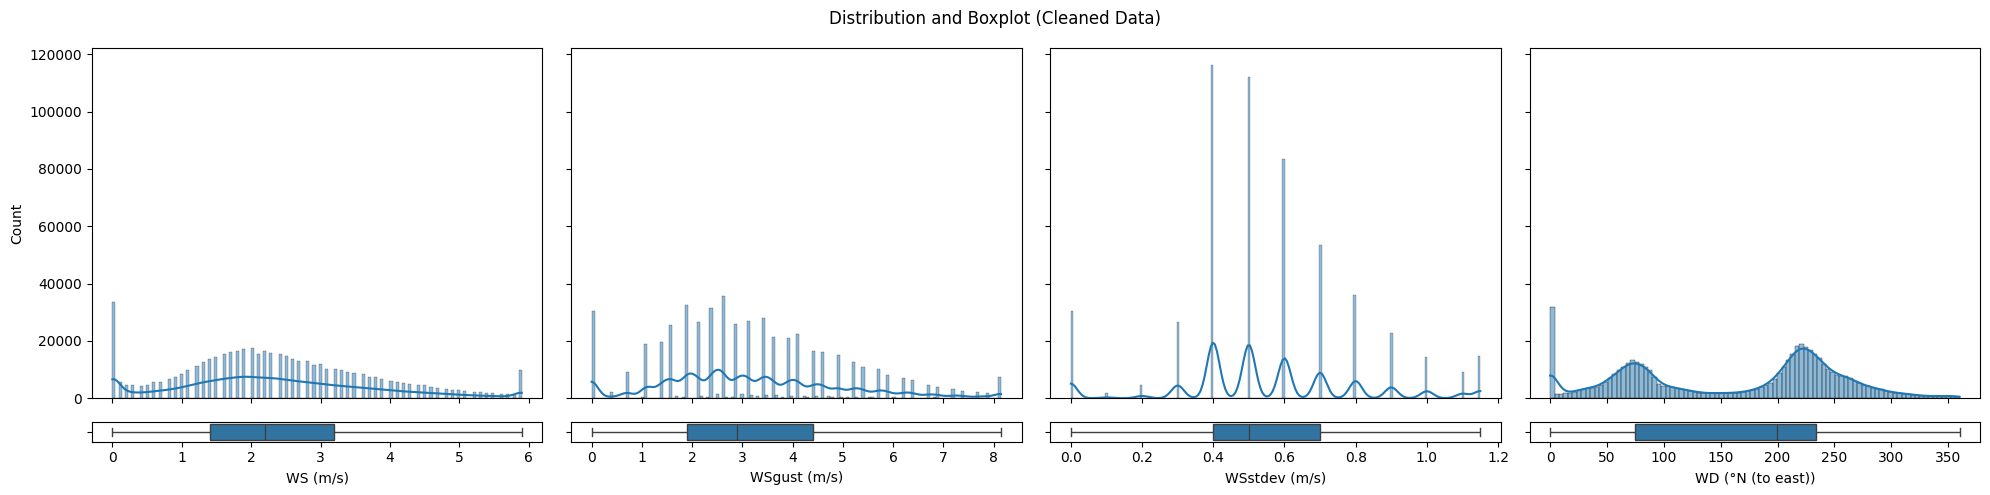

In [ ]:
generate_hist_box_plots(
    df_sl,
    plot_data=[
        {"column": "WS", "label": "WS (m/s)"},
        {"column": "WSgust", "label": "WSgust (m/s)"},
        {"column": "WSstdev", "label": "WSstdev (m/s)"},
        {"column": "WD", "label": "WD (°N (to east))"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)
generate_hist_box_plots(
    df_sl_cleaned,
    plot_data=[
        {"column": "WS", "label": "WS (m/s)"},
        {"column": "WSgust", "label": "WSgust (m/s)"},
        {"column": "WSstdev", "label": "WSstdev (m/s)"},
        {"column": "WD", "label": "WD (°N (to east))"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

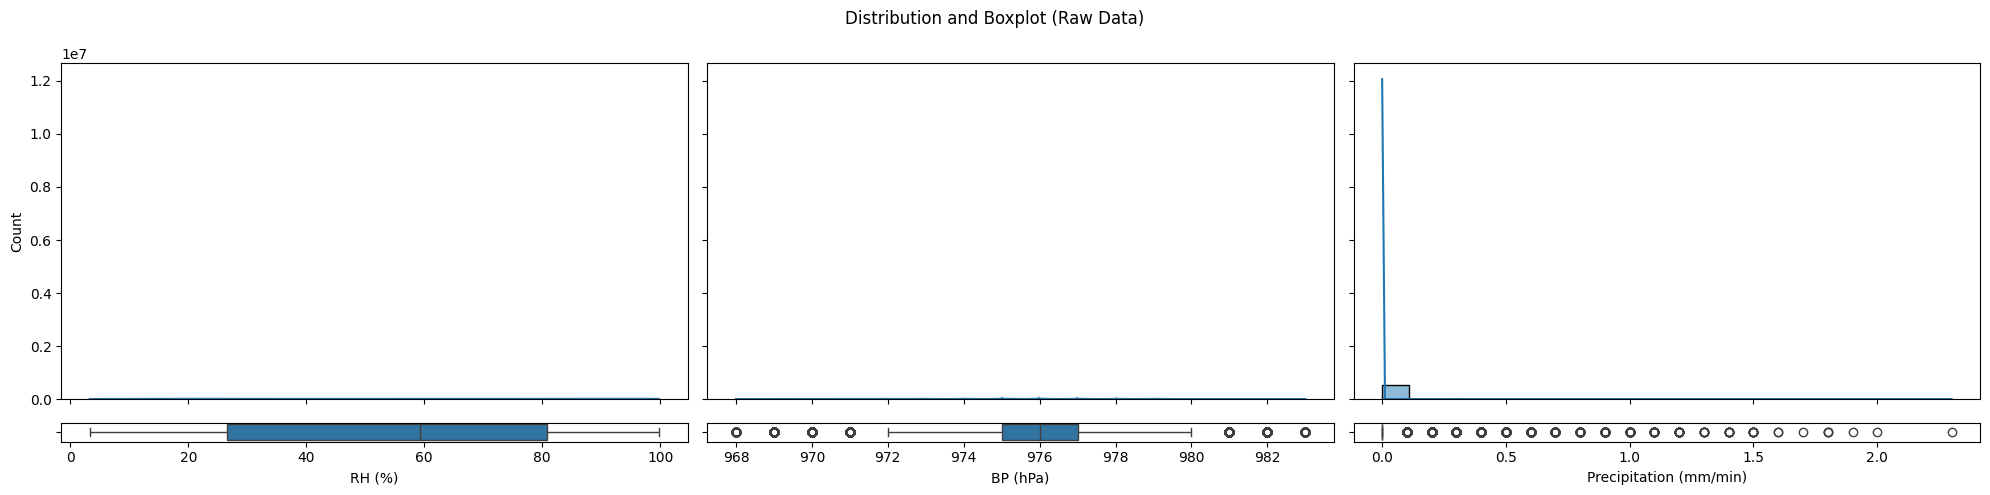

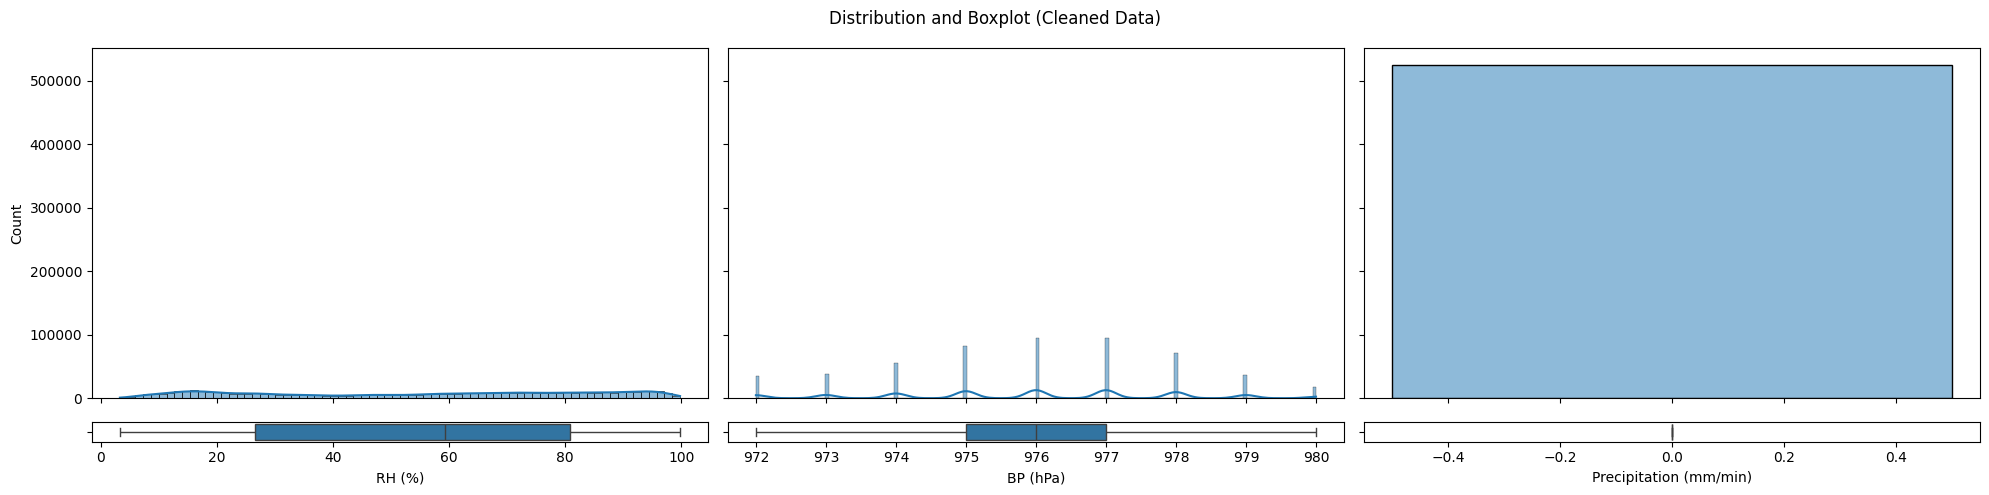

In [ ]:
generate_hist_box_plots(
    df_sl,
    plot_data=[
        {"column": "RH", "label": "RH (%)"},
        {"column": "BP", "label": "BP (hPa)"},
        {"column": "Precipitation", "label": "Precipitation (mm/min)"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)
generate_hist_box_plots(
    df_sl_cleaned,
    plot_data=[
        {"column": "RH", "label": "RH (%)"},
        {"column": "BP", "label": "BP (hPa)"},
        # {"column": "Cleaning", "label": "Cleaning (1 or 0)"},
        {"column": "Precipitation", "label": "Precipitation (mm/min)"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

## Correlation Analysis

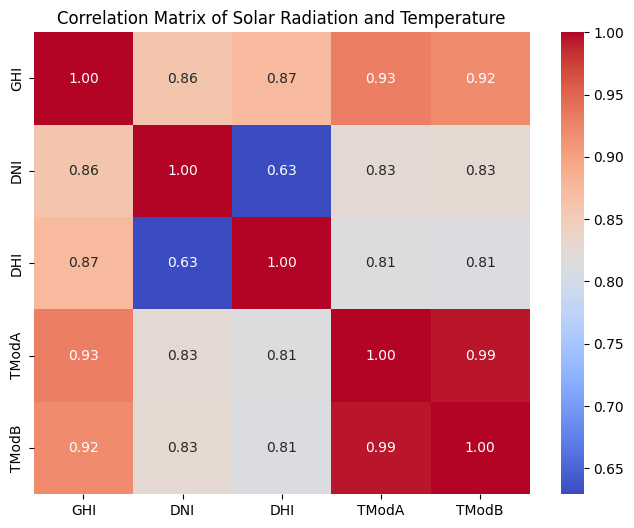

In [68]:
# Correlation matrix between solar radiation components and temperature measures
correlation_matrix = df_sl[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Solar Radiation and Temperature")
plt.show()

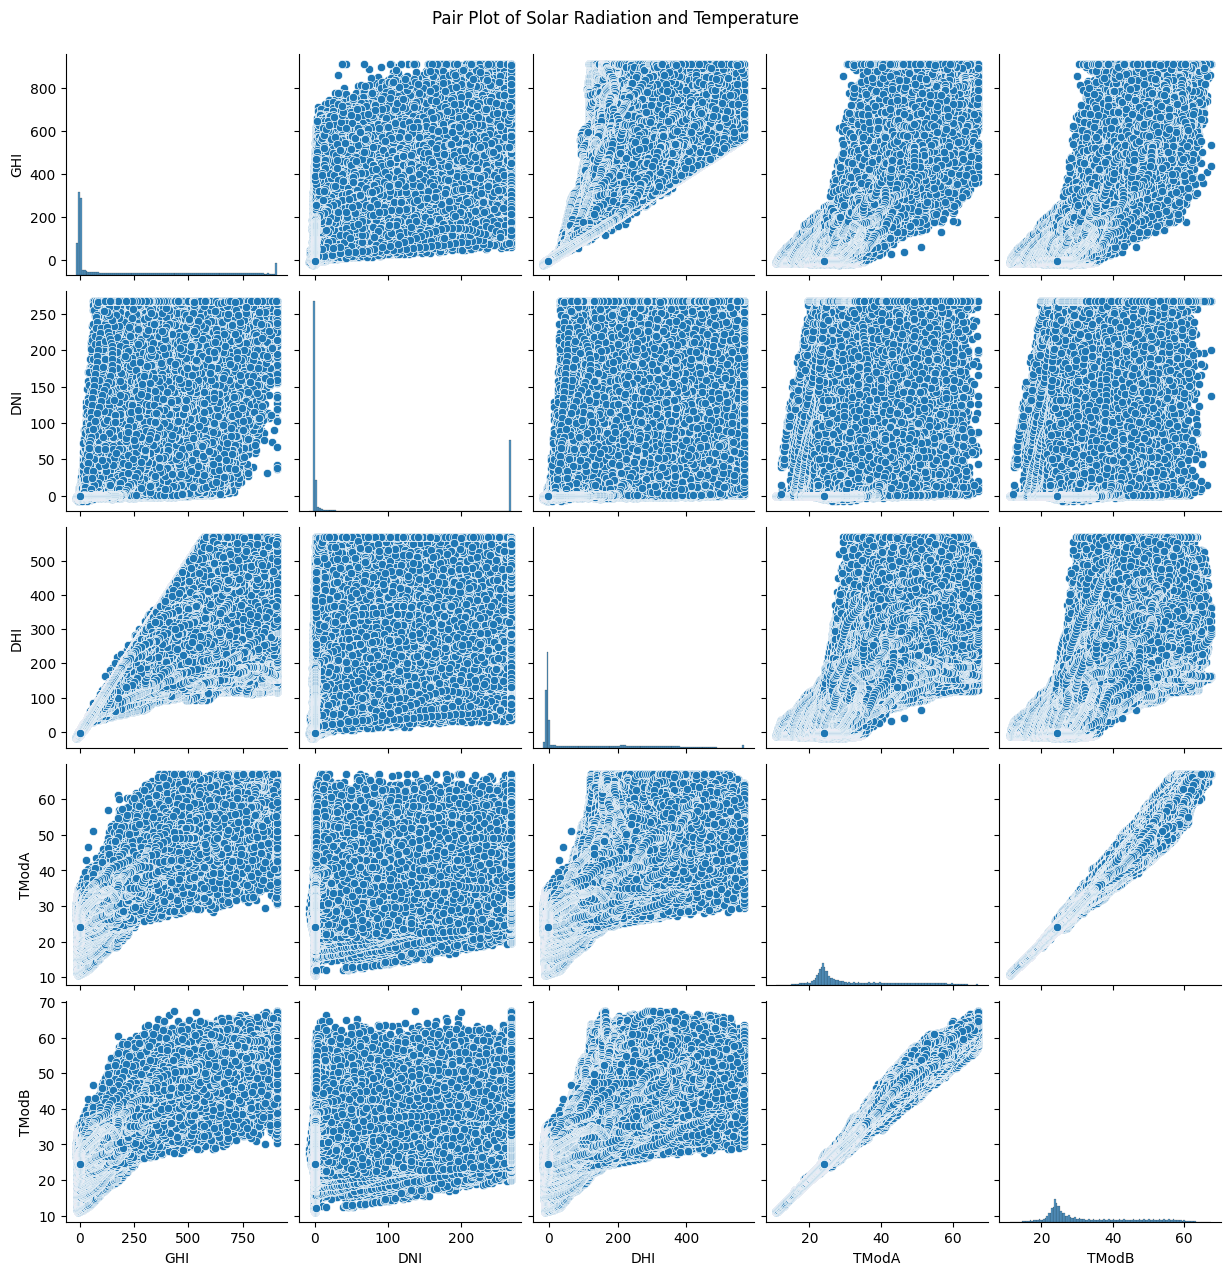

In [69]:
# Pair Plot between solar radiation components and temperature measures
sns.pairplot(df_sl[["GHI", "DNI", "DHI", "TModA", "TModB"]])
plt.suptitle("Pair Plot of Solar Radiation and Temperature", y=1.02)
plt.show()

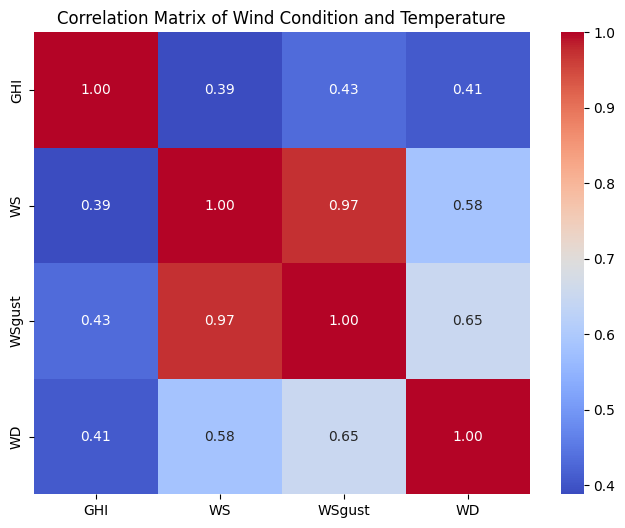

In [70]:
# Correlation matrix between wind condition components and temperature measures
correlation_matrix = df_sl[["GHI", "WS", "WSgust", "WD"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Wind Condition and Temperature")
plt.show()

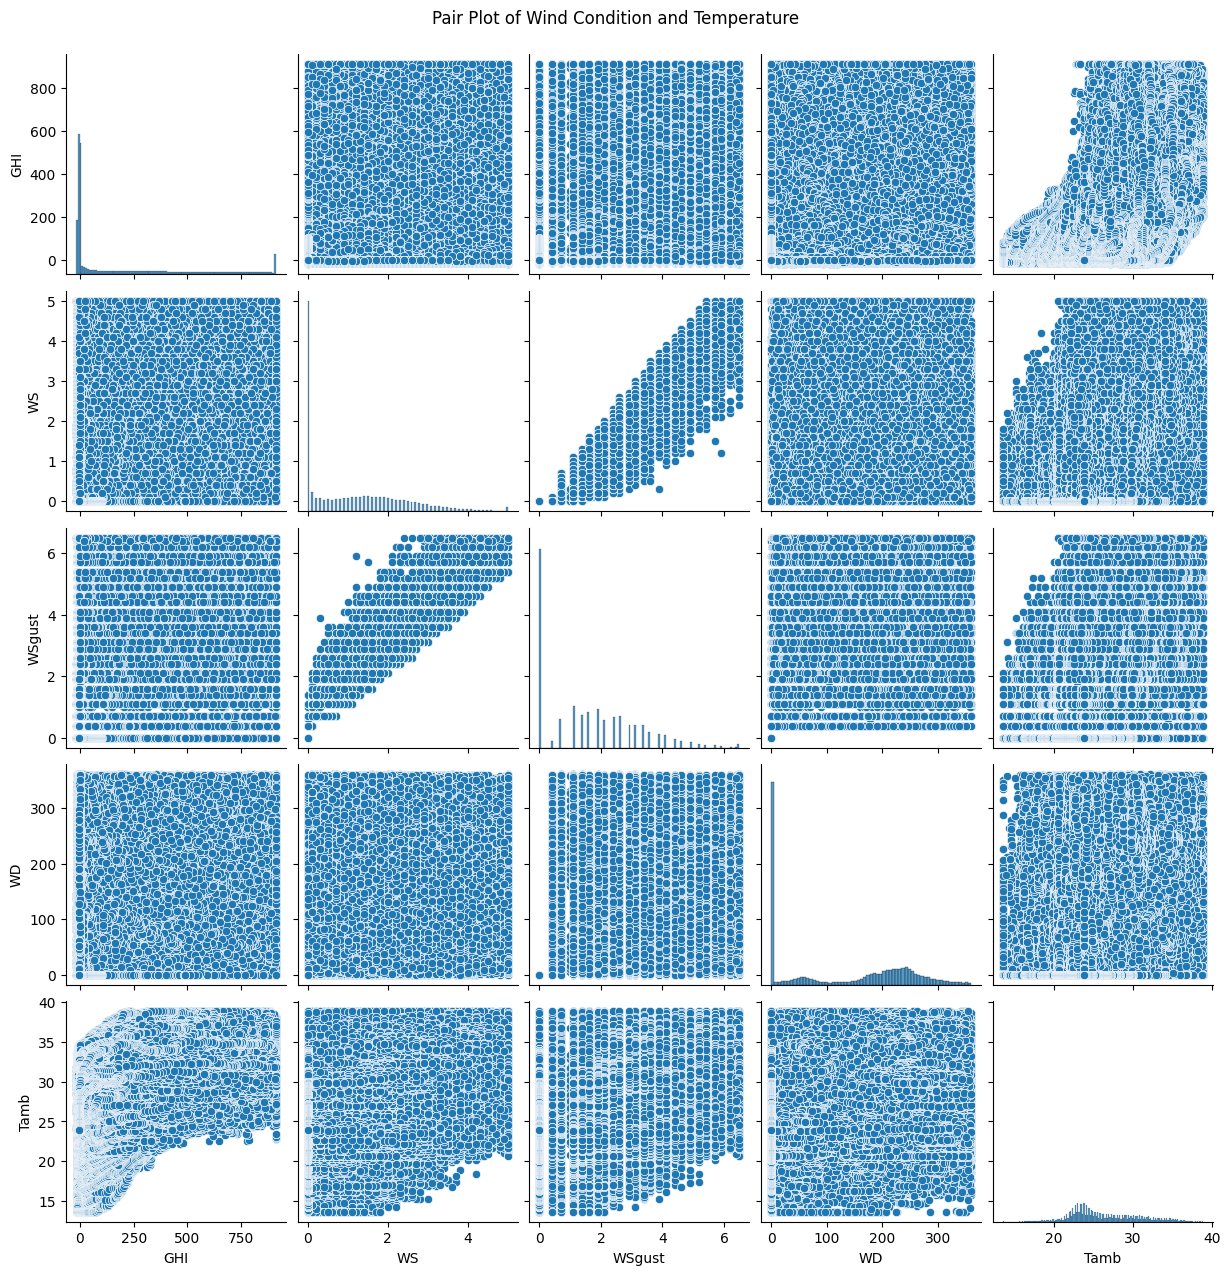

In [81]:
# Pair Plot between wind conditions components and temperature measures
sns.pairplot(df_sl[["GHI", "WS", "WSgust", "WD", "Tamb"]])
plt.suptitle("Pair Plot of Wind Condition and Temperature", y=1.02)
plt.show()

Observations:
- There are no observable correlation between tempreture and wind conditions

## Wind Analysis

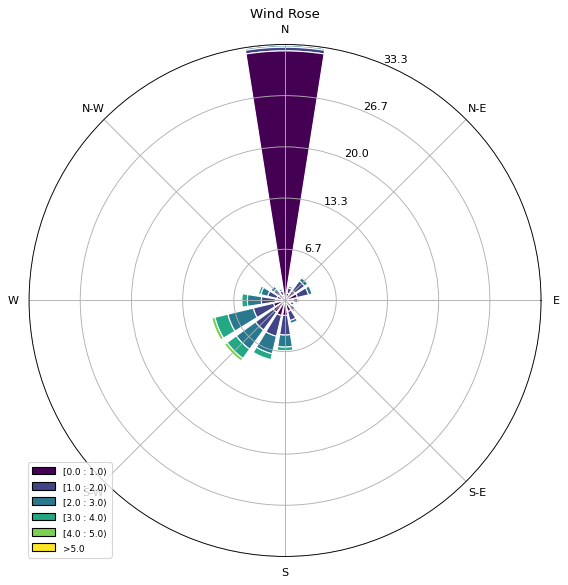

In [74]:
# Wind Analysis using wind roses
ax = WindroseAxes.from_ax()
ax.bar(df_sl_cleaned["WD"], df_sl_cleaned["WS"], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()
plt.title("Wind Rose")
plt.show()

## Temperature Analysis

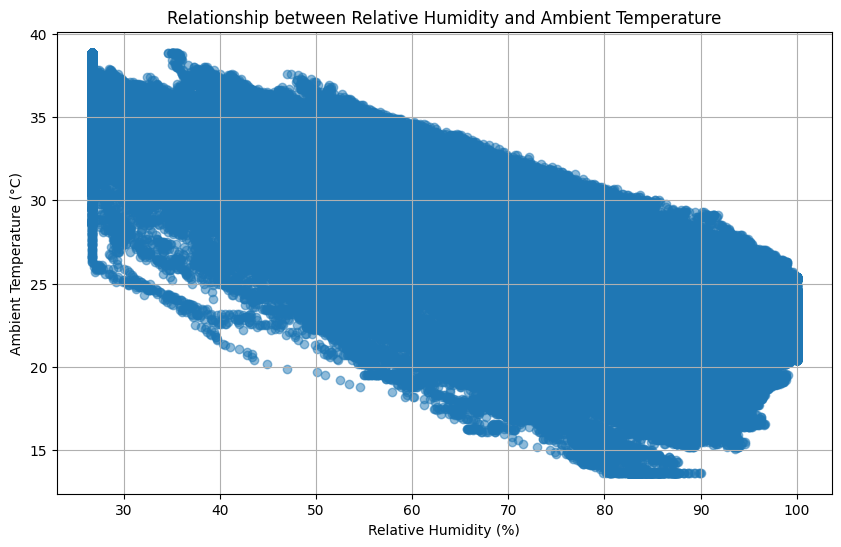

Correlation between Ambient Temperature and Relative Humidity: -0.7924424924522765


In [73]:
# scatter plot of ambient temperature vs. relative humidity
plt.figure(figsize=(10, 6))
plt.scatter(df_sl["RH"], df_sl["Tamb"], alpha=0.5)
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.title("Relationship between Relative Humidity and Ambient Temperature")
plt.grid(True)
plt.show()

# the pearson correlation between 'Tamb' and 'RH'
correlation = df_sl["Tamb"].corr(df_sl["RH"])
print(f"Correlation between Ambient Temperature and Relative Humidity: {correlation}")

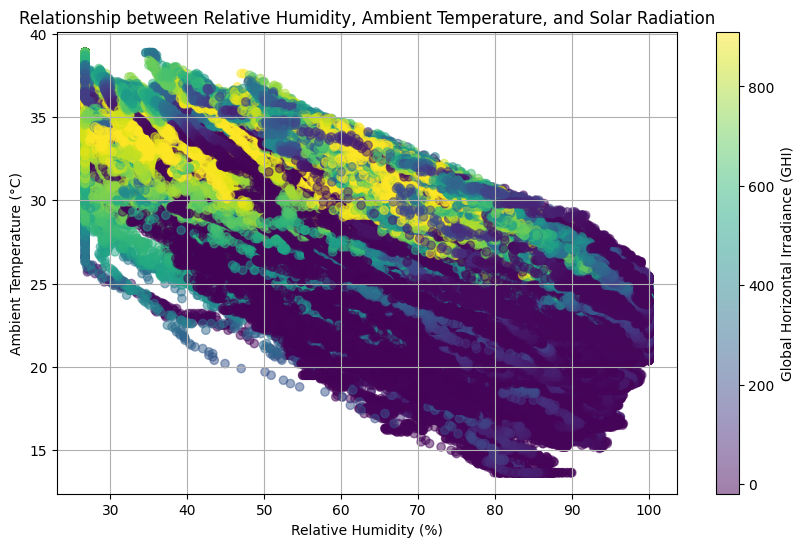

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_sl["RH"], df_sl["Tamb"], c=df_sl["GHI"], cmap="viridis", alpha=0.5
)  #'GHI' is the solar radiation data
plt.colorbar(label="Global Horizontal Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.title(
    "Relationship between Relative Humidity, Ambient Temperature, and Solar Radiation"
)
plt.grid(True)
plt.show()

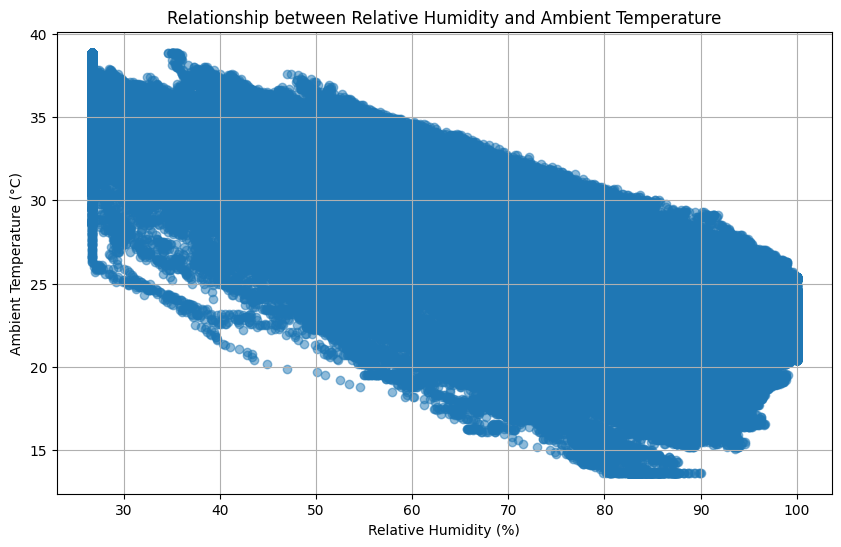

Correlation between Ambient Temperature and Relative Humidity: -0.7924424924522765


In [76]:
# Create a scatter plot of 'Tamb' (ambient temperature) vs. 'RH' (relative humidity)
plt.figure(figsize=(10, 6))
plt.scatter(
    df_sl["RH"], df_sl["Tamb"], alpha=0.5
)  # Use alpha for better visualization if many points overlap
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.title("Relationship between Relative Humidity and Ambient Temperature")
plt.grid(True)
plt.show()

# Calculate the correlation between 'Tamb' and 'RH'
correlation = df_sl["Tamb"].corr(df_sl["RH"])
print(f"Correlation between Ambient Temperature and Relative Humidity: {correlation}")

## Z-Score Analysis

In [77]:
# Calculate Z-scores for each numeric column
columns = [
    "GHI",
    "DNI",
    "DHI",
    "ModA",
    "ModB",
    "Tamb",
    "RH",
    "WS",
    "WSgust",
    "WD",
    "BP",
    "Cleaning",
    "Precipitation",
    "TModA",
    "TModB",
]
outlier_columns = [f"{col}_zscore" for col in columns]
df_outliers = pd.DataFrame(columns=outlier_columns, index=df_sl.index)


for col in columns:
    df_outliers[f"{col}_zscore"] = np.abs((df_sl[col] - df_sl[col].mean()) / df_sl[col].std())
df_outliers.head(2)

GHI_zscore  DNI_zscore  DHI_zscore  ModA_zscore  \
Timestamp                                                              
2021-10-30 00:01:00    0.687403    0.603093    0.723842      0.69542   
2021-10-30 00:02:00    0.687403    0.603093    0.723842      0.69542   

                     ModB_zscore  Tamb_zscore  RH_zscore  WS_zscore  \
Timestamp                                                             
2021-10-30 00:01:00     0.695441     1.005156   0.972634   0.944802   
2021-10-30 00:02:00     0.695441     1.005156   0.977627   0.944802   

                     WSgust_zscore  WD_zscore  BP_zscore  Cleaning_zscore  \
Timestamp                                                                   
2021-10-30 00:01:00        1.07465    1.16415   1.040922         0.031104   
2021-10-30 00:02:00        1.07465    1.16415   1.040922         0.031104   

                     Precipitation_zscore  TModA_zscore  TModB_zscore  
Timestamp                                                              
2021-10-30 00:01:00                   NaN      0.820844      0.832125  
2021-10-30 00:02:00                   NaN      0.820844      0.832125

In [78]:
# Threshold for flagging outliers
threshold = 2

# Identify outliers
outliers = df_outliers[
    df_outliers[[f"{col}" for col in df_outliers.columns]].any(axis=1) > threshold
]

print("Outliers based on Z-score:")
outliers

Outliers based on Z-score:


Empty DataFrame
Columns: [GHI_zscore, DNI_zscore, DHI_zscore, ModA_zscore, ModB_zscore, Tamb_zscore, RH_zscore, WS_zscore, WSgust_zscore, WD_zscore, BP_zscore, Cleaning_zscore, Precipitation_zscore, TModA_zscore, TModB_zscore]
Index: []

Observations:
- Since we already cleaned the outliers using inter-quartile range method, the z-score didn't find any outlier.

## Temperature Analysis

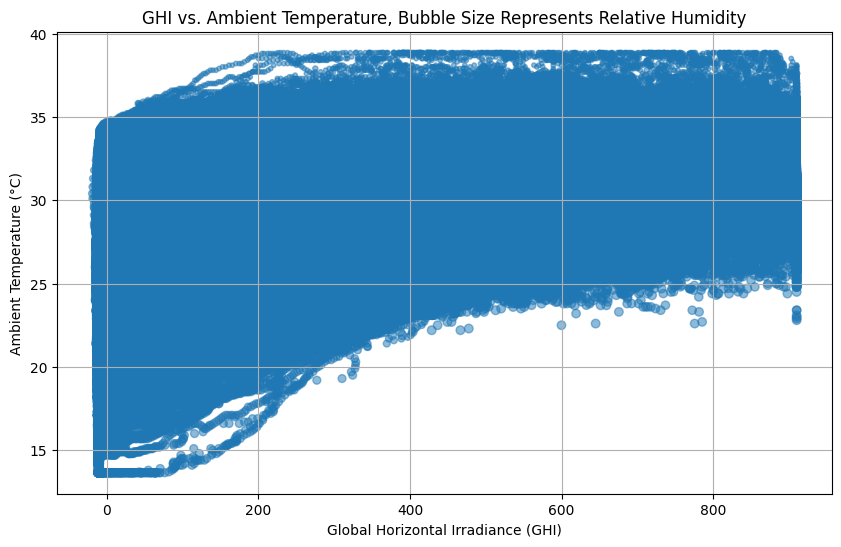

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_sl["GHI"], df_sl["Tamb"], s=df_sl["RH"] * 0.4, alpha=0.5
)  # adjust the 0.1 for size if needed
plt.xlabel("Global Horizontal Irradiance (GHI)")
plt.ylabel("Ambient Temperature (°C)")
plt.title("GHI vs. Ambient Temperature, Bubble Size Represents Relative Humidity")
plt.grid(True)
plt.show()

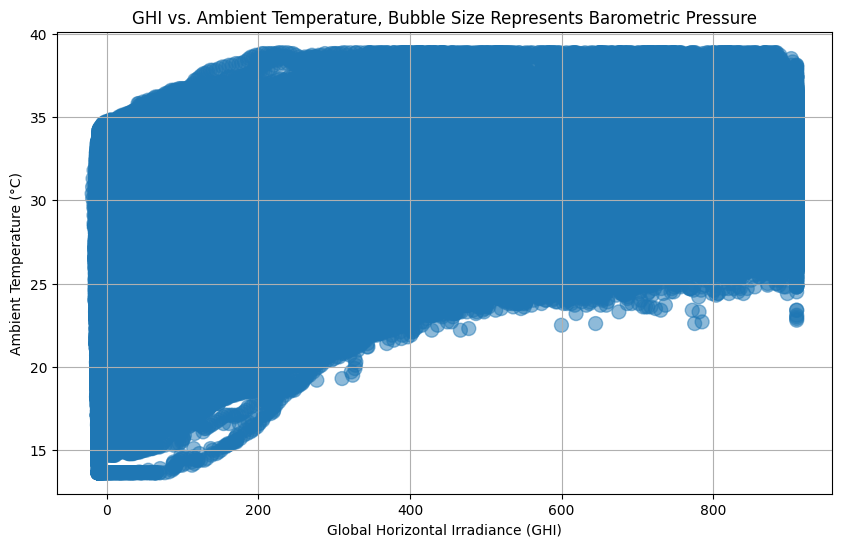

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(df_sl["GHI"], df_sl["Tamb"], s=df_sl["BP"] * 0.1, alpha=0.5)
plt.xlabel("Global Horizontal Irradiance (GHI)")
plt.ylabel("Ambient Temperature (°C)")
plt.title("GHI vs. Ambient Temperature, Bubble Size Represents Barometric Pressure")
plt.grid(True)
plt.show()